The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

Attribute Information :

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour 

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius 

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Used KNN Regressor, Linear Regression, Decision Tree, Random Forest Regressor for Prediction

Error metric used are - R-square, RMSE

# IMPORTING LIBRARIES 

In [1]:
# Import necessary libraries

import pandas as pd    
import numpy as np      
from matplotlib import pyplot as plt 
import seaborn as sns               

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# DATA LOADING

In [2]:
# Data Loading

df=pd.read_csv(r'C:\Users\tarun\Documents\ML PROJECT\SeoulBikeData.csv',encoding= 'unicode_escape')

# EXPLORATORY  DATA  ANALYSIS

In [3]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are total 14 columns

No null values 

4 categorical variables

6 Numerical variables containing decimal values

4 Numerical variables containg integer values

In [6]:
df['Hour'] = df['Hour'].astype(object)

In [7]:
df=df.drop('Date',axis=1)

In [8]:
df

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254    0             -5.2           37               2.2   
1                   204    1             -5.5           38               0.8   
2                   173    2             -6.0           39               1.0   
3                   107    3             -6.2           40               0.9   
4                    78    4             -6.0           36               2.3   
...                 ...  ...              ...          ...               ...   
8755               1003   19              4.2           34               2.6   
8756                764   20              3.4           37               2.3   
8757                694   21              2.6           39               0.3   
8758                712   22              2.1           41               1.0   
8759                584   23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
0              0.0            0.0  Winter  No Holiday             Yes  
1              0.0            0.0  Winter  No Holiday             Yes  
2              0.0            0.0  Winter  No Holiday             Yes  
3              0.0            0.0  Winter  No Holiday             Yes  
4              0.0            0.0  Winter  No Holiday             Yes  
...            ...            ...     ...         ...             ...  
8755           0.0            0.0  Autumn  No Holiday             Yes  
8756           0.0            0.0  Autumn  No Holiday             Yes  
8757           0.0            0.0  Autumn  No Holiday             Yes  
8758           0.0            0.0  Autumn  No Holiday             Yes  
8759           0.0            0.0  Autumn  No Holiday             Yes  

[8760 rows x 13 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage:

In [10]:
df.describe().T

count         mean         std   min    25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.0   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.5   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.0   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.9   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.0   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.7   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.0   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.0   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.0   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [11]:
df.shape

(8760, 13)

In [12]:
# Check for duplicated entries

df.duplicated().sum()

0

There are no duplicate records in the dataset

In [13]:
# checking for null values in each column
df.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
# Checking for unique values in each column
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [15]:
df.agg(['skew', 'kurtosis']).transpose()

C:\Users\tarun\AppData\Local\Temp\ipykernel_23392\1018153801.py:1: FutureWarning: ['Seasons', 'Holiday', 'Functioning Day'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['skew', 'kurtosis']).transpose()


skew    kurtosis
Rented Bike Count           1.153428    0.853387
Hour                        0.000000   -1.204176
Temperature(°C)            -0.198326   -0.837786
Humidity(%)                 0.059579   -0.803559
Wind speed (m/s)            0.890955    0.727179
Visibility (10m)           -0.701786   -0.961980
Dew point temperature(°C)  -0.367298   -0.755430
Solar Radiation (MJ/m2)     1.504040    1.126433
Rainfall(mm)               14.533232  284.991099
Snowfall (cm)               8.440801   93.803324

# Normality Check

In [21]:
from scipy.stats import shapiro
stat, p = shapiro(df['Rented Bike Count'])
print(stat, p)

from scipy.stats import normaltest
stat, p = normaltest(df['Rented Bike Count'])
print(stat,p)

0.8822193145751953 0.0
1415.73323838599 3.779491395679156e-308


C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Box Plot for Numerical Variables

<AxesSubplot:xlabel='Temperature(°C)'>

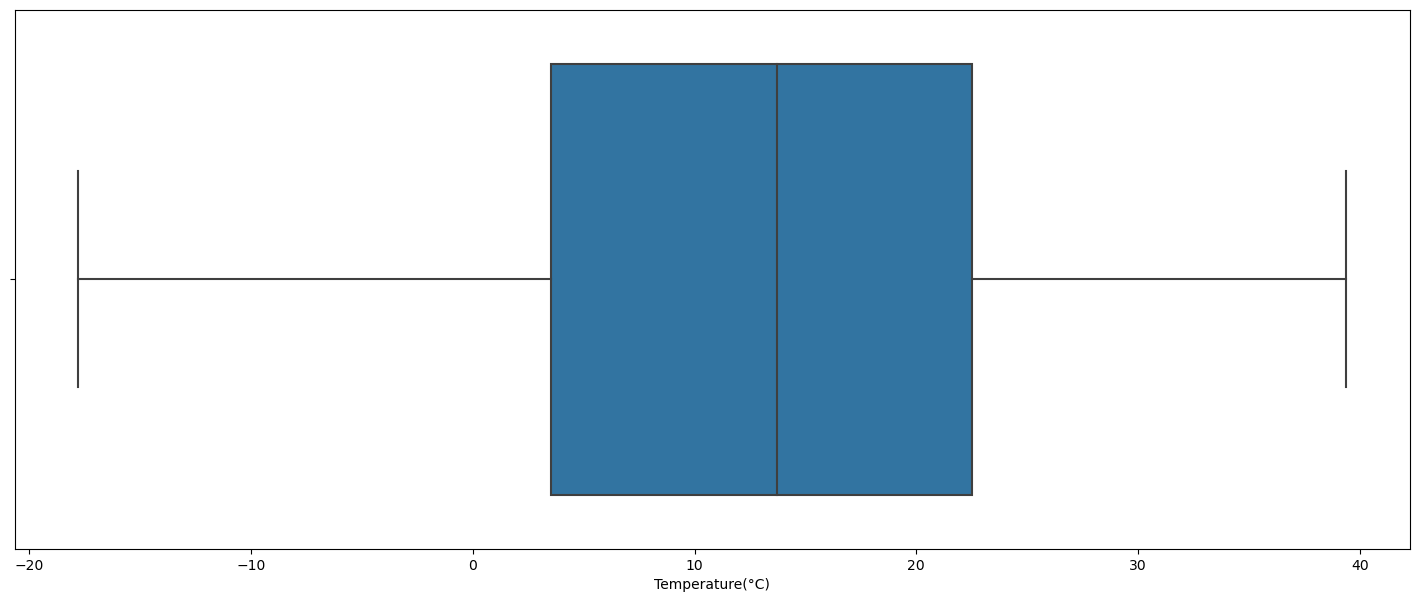

In [16]:
plt.rcParams["figure.figsize"] = (18,7)

sns.boxplot(x=df['Temperature(°C)'])

As we can see in Box Plot there is no outlier

<AxesSubplot:xlabel='Humidity(%)'>

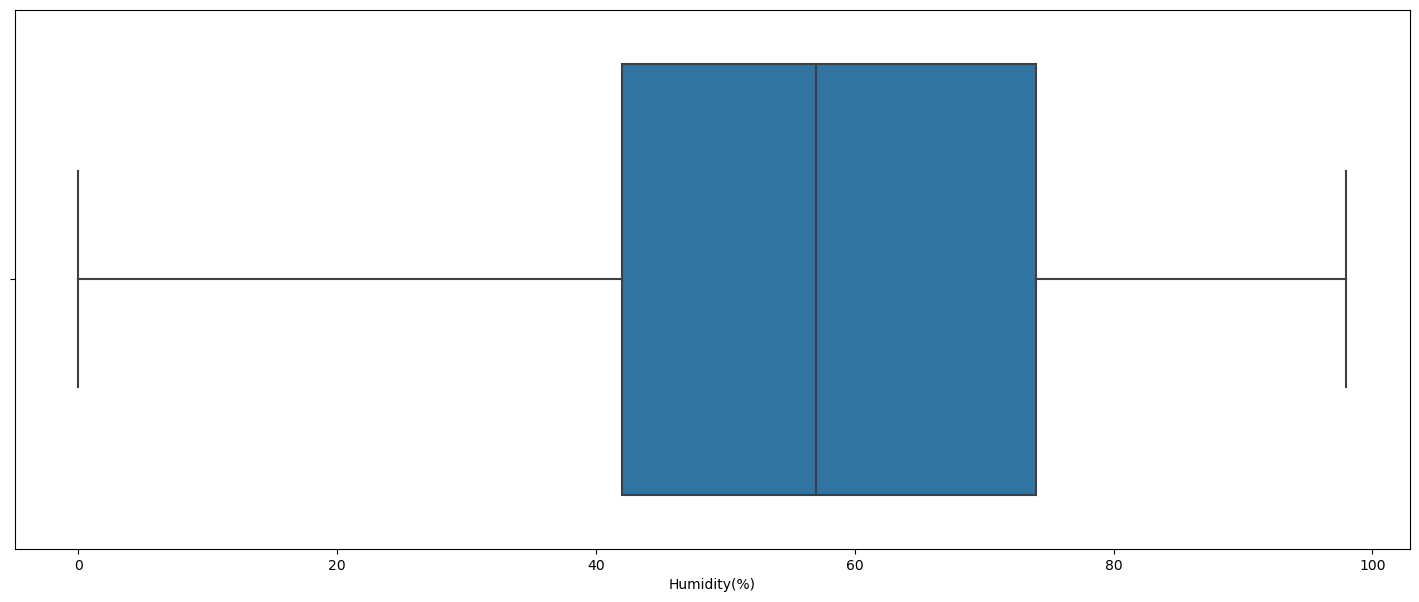

In [17]:
plt.rcParams["figure.figsize"] = (18,7)

sns.boxplot(x=df['Humidity(%)'])

As we can see in Box Plot there is no outlier

<AxesSubplot:xlabel='Wind speed (m/s)'>

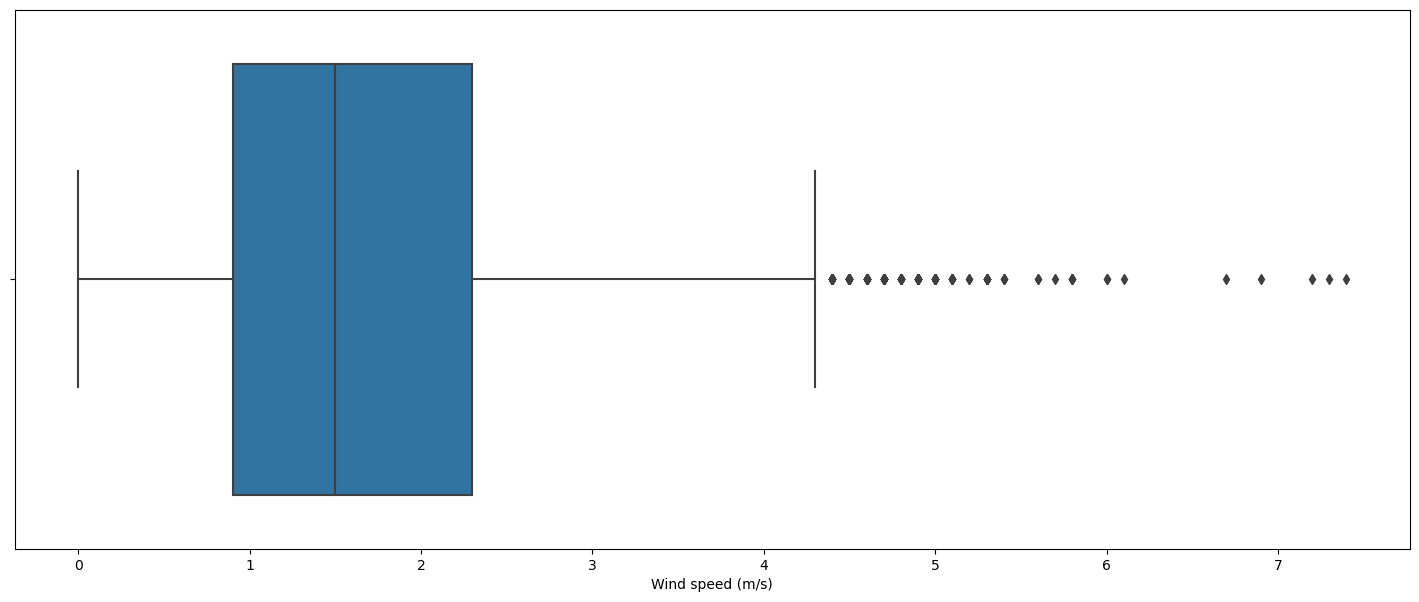

In [18]:
plt.rcParams["figure.figsize"] = (18,7)

sns.boxplot(x=df['Wind speed (m/s)'])

In [19]:
Q1 = df['Wind speed (m/s)'].quantile(0.25)
Q3 = df['Wind speed (m/s)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.4


In [20]:
ul= Q3 + 1.5 * IQR
ll= Q1 - 1.5 * IQR
outliers = df[(df['Wind speed (m/s)'] > ul) | (df['Wind speed (m/s)'] < ll)]
len(outliers)

161

<AxesSubplot:xlabel='Visibility (10m)'>

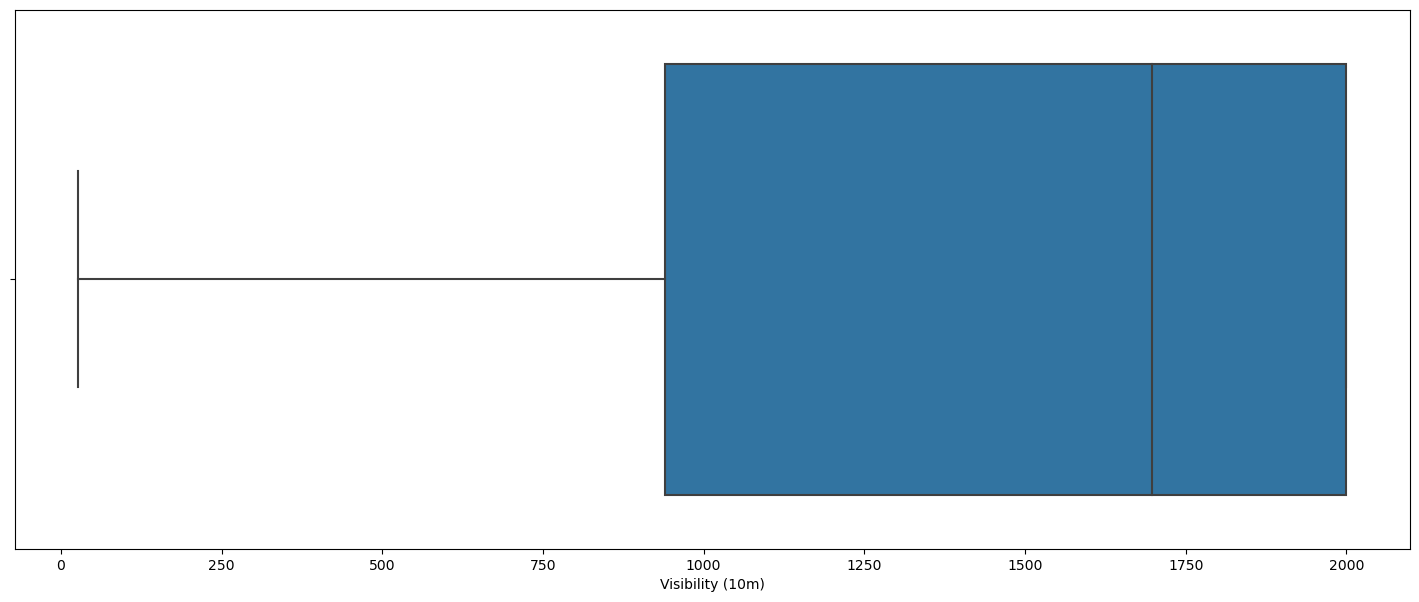

In [21]:
plt.rcParams["figure.figsize"] = (18,7)

sns.boxplot(x=df['Visibility (10m)'])

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

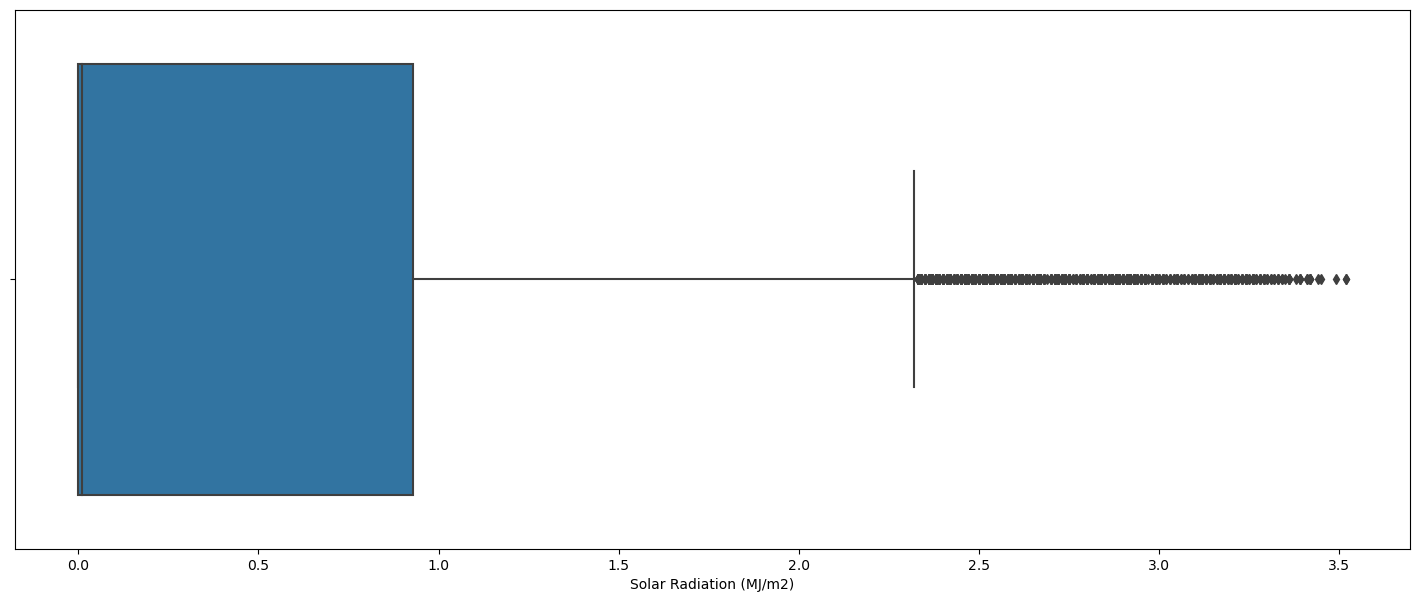

In [22]:
plt.rcParams["figure.figsize"] = (18,7)

sns.boxplot(x=df['Solar Radiation (MJ/m2)'])

<AxesSubplot:xlabel='Rainfall(mm)'>

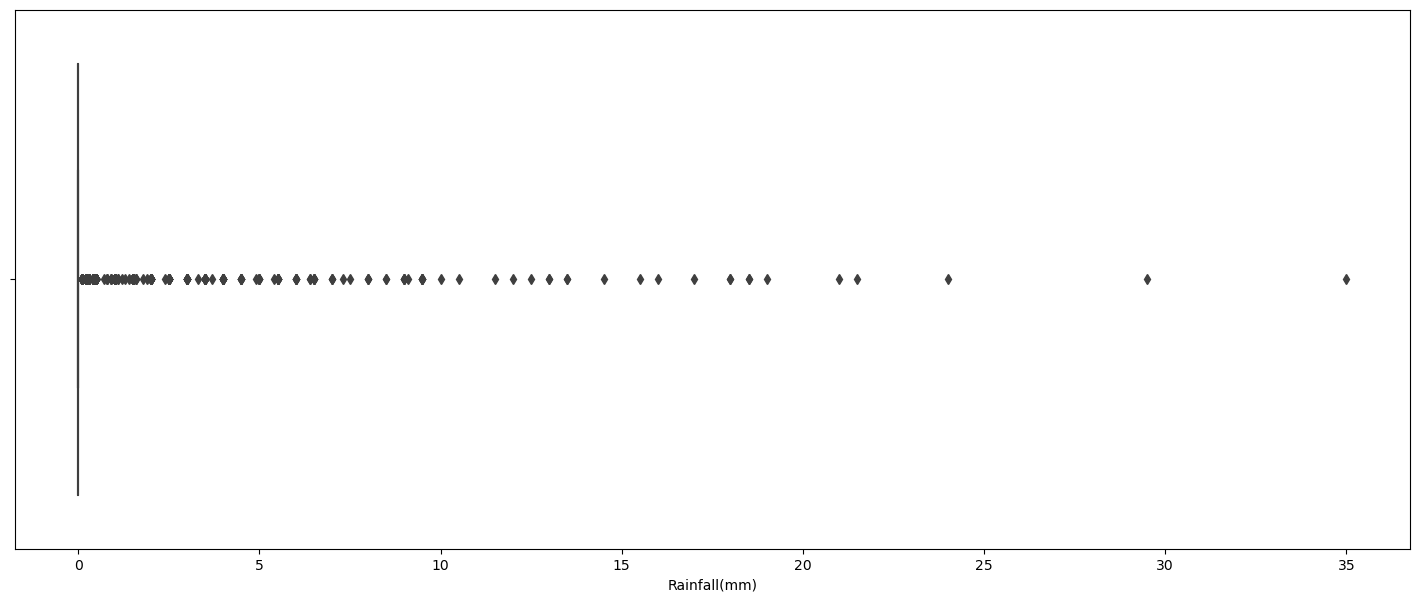

In [23]:
plt.rcParams["figure.figsize"] = (18,7)

sns.boxplot(x=df['Rainfall(mm)'])

In [24]:
Q1 = df['Rainfall(mm)'].quantile(0.25)
Q3 = df['Rainfall(mm)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


In [25]:
ul= Q3 + 3 * IQR
ll= Q1 - 3 * IQR
outliers = df[(df['Rainfall(mm)'] > ul) | (df['Rainfall(mm)'] < ll)]
len(outliers)

528

<AxesSubplot:xlabel='Snowfall (cm)'>

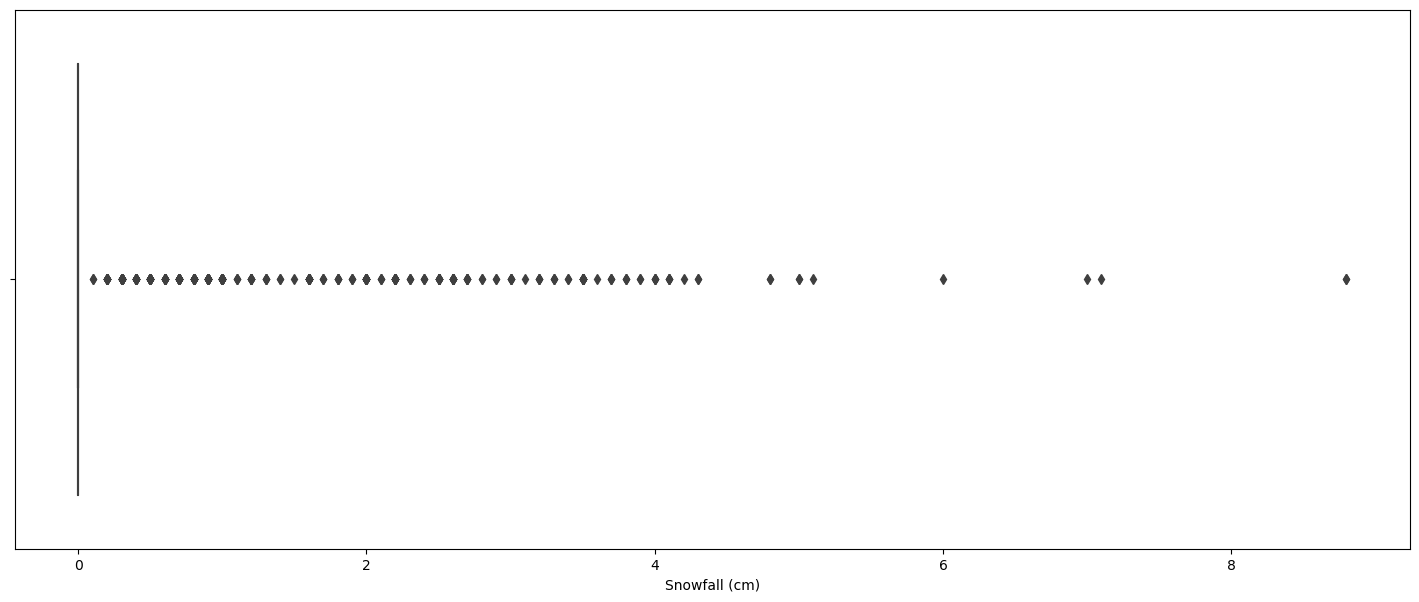

In [26]:
plt.rcParams["figure.figsize"] = (18,7)

sns.boxplot(x=df['Snowfall (cm)'])

In [27]:
Q1 = df['Snowfall (cm)'].quantile(0.25)
Q3 = df['Snowfall (cm)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


In [28]:
ul= Q3 + 3 * IQR
ll= Q1 - 3 * IQR
outliers = df[(df['Snowfall (cm)'] > ul) | (df['Snowfall (cm)'] < ll)]
len(outliers)

443

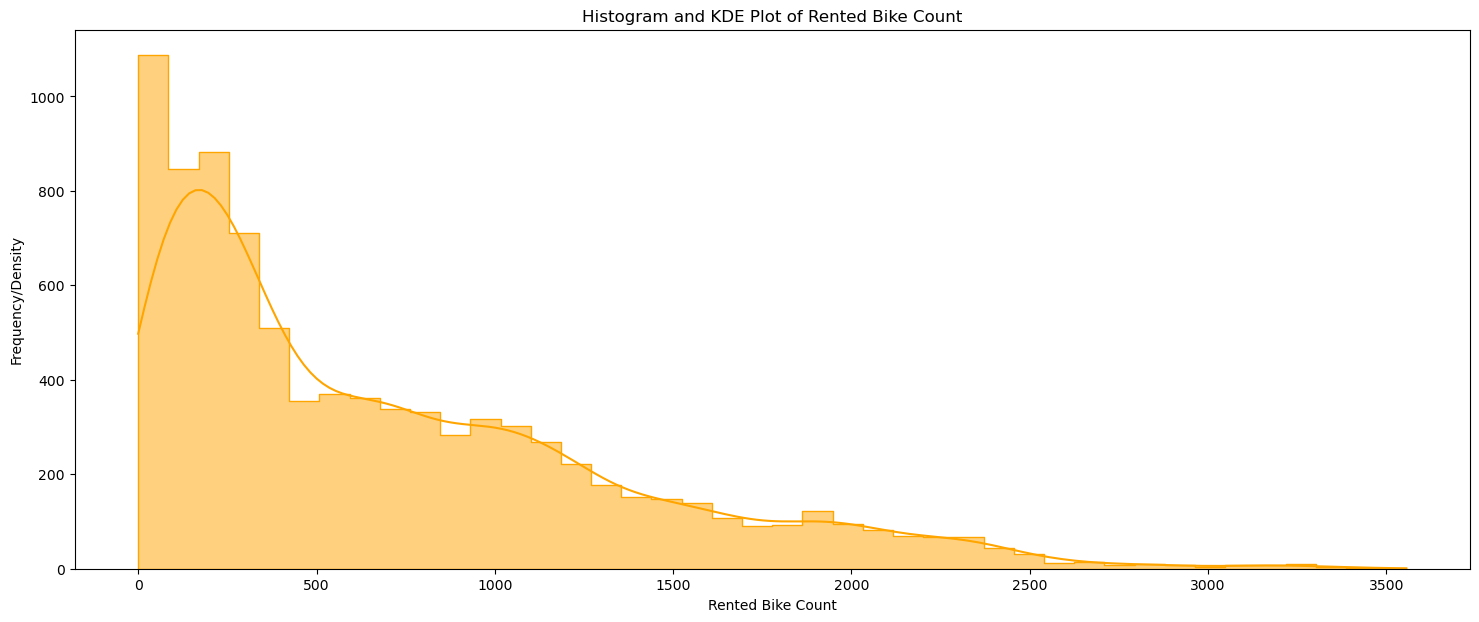

In [29]:
# Plotting histplot
sns.histplot(df['Rented Bike Count'], kde=True, element='step', color='orange')

plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency/Density')
plt.title('Histogram and KDE Plot of Rented Bike Count')

plt.show()

From above graph we get to know that data it is positively skewed

In [37]:
#selecting variables that have data types float and int.
num_cols=list(df.select_dtypes(include=['float64','int64']).columns)

# VISUALIZATION OF DATA DISTRIBUTION

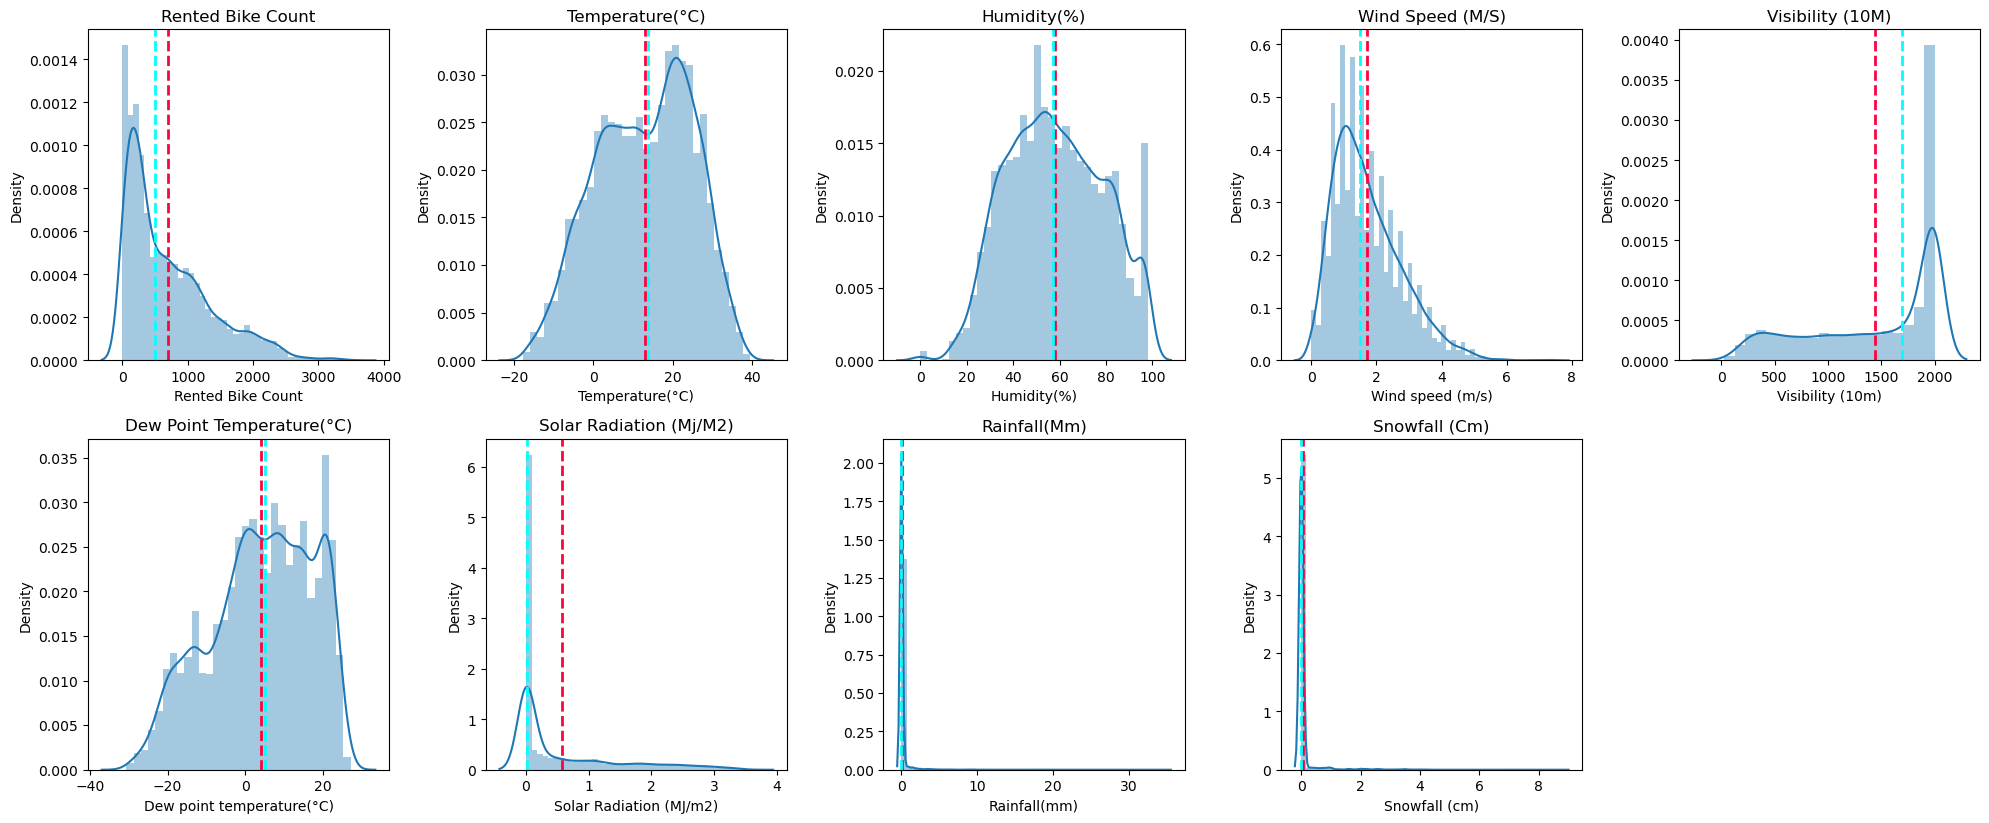

In [40]:
# analysis of data distribution
fig = plt.figure(figsize = (20,12))
for index,column in enumerate(num_cols) :
  plt.subplot(3,5,index+1)
  sns.distplot(df[column])
  feature = df[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) 
  plt.title(f'{column.title()}')
  plt.tight_layout()

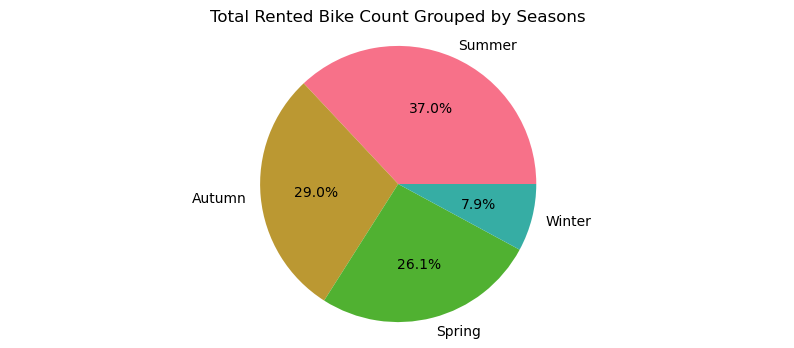

In [41]:
# Grouping by seasons and calculating the total rented bike count
season_counts = df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False).reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 4))
plt.pie(season_counts['Rented Bike Count'], labels=season_counts['Seasons'], autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.title('Total Rented Bike Count Grouped by Seasons')
plt.axis('equal') 
plt.show()

As we can see in the above Graph, Count of Rented Bike is highest in Summer followed by Autumn , Spring and Winter

In [42]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Seasons  Rented Bike Count
0  Summer            2283234
1  Autumn            1790002
2  Spring            1611909
3  Winter             487169

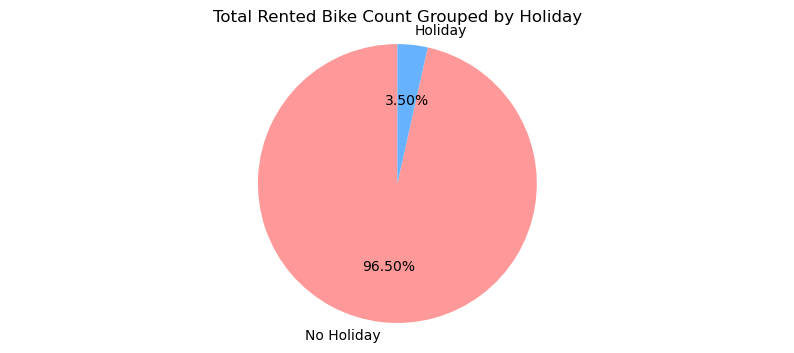

In [43]:
# Grouping by holiday and calculating the total rented bike count
holiday_counts = df.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending=False).reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 4))
plt.pie(holiday_counts['Rented Bike Count'], labels=holiday_counts['Holiday'], autopct='%1.2f%%', startangle=90, colors=['#FF9999', '#66B2FF'])
plt.title('Total Rented Bike Count Grouped by Holiday')
plt.axis('equal')
plt.show()

We can see in the Pie Chart that 96.5% of the bikes are rented on working days

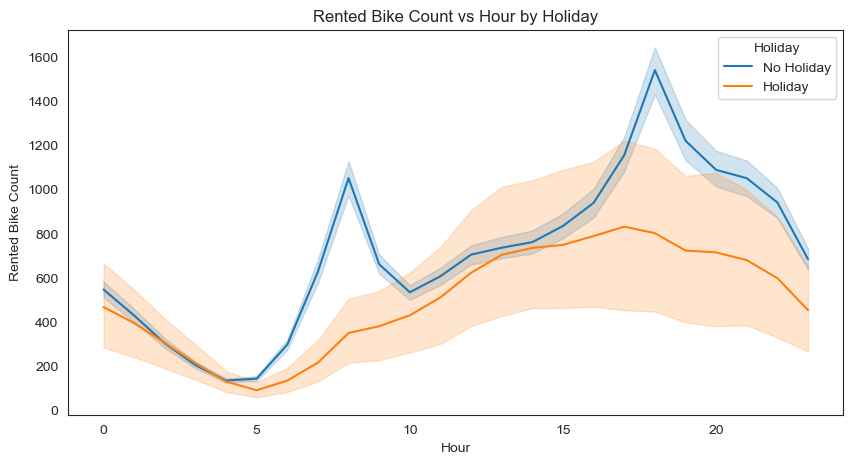

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Holiday', data=df)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Hour by Holiday')
plt.legend(title='Holiday')
plt.show()

Rented Bike count is more on Working days as compared to Holidays

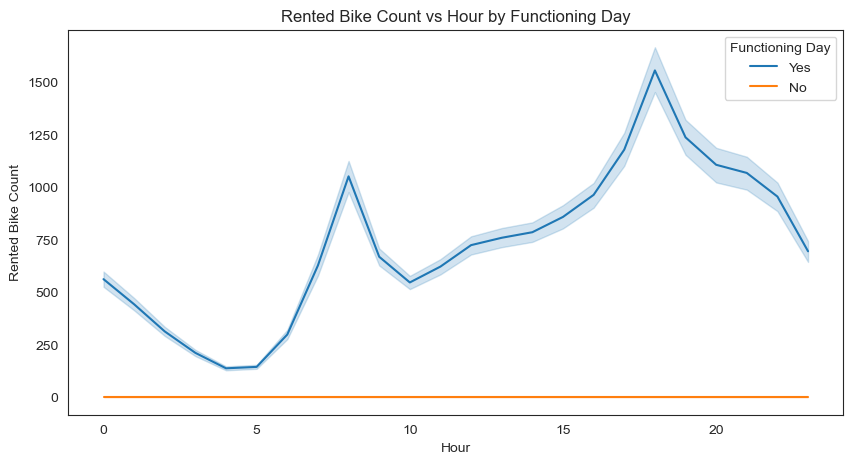

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Functioning Day', data=df)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Hour by Functioning Day')
plt.legend(title='Functioning Day')
plt.show()

The line chart us showing there is no Rented bike for Non functioning day

The peaks of Rented bike count is in Evening between 15:00-20:00 hrs

The lowest is in the early morning at around 5:00 hrs and then there is an increase  in demand after 5:00Hrs and then dips at around 10:00 hrs

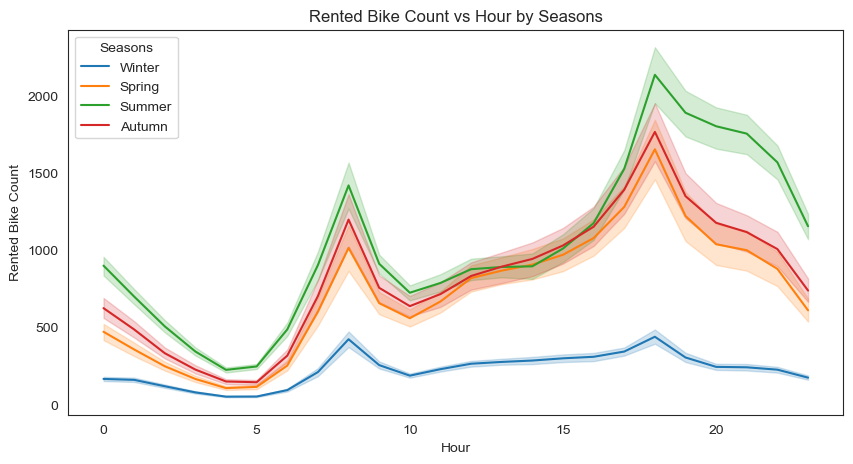

In [46]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=df)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Hour by Seasons')
plt.legend(title='Seasons')
plt.show()

Summer season has highest count of Rented Bikes

Winter Season sees lowest count of Rented Bikes

Peaks are in morning between 5:00-10:00 hrs  and in the evening between 15:00-20:00 hrs

<Figure size 600x600 with 0 Axes>

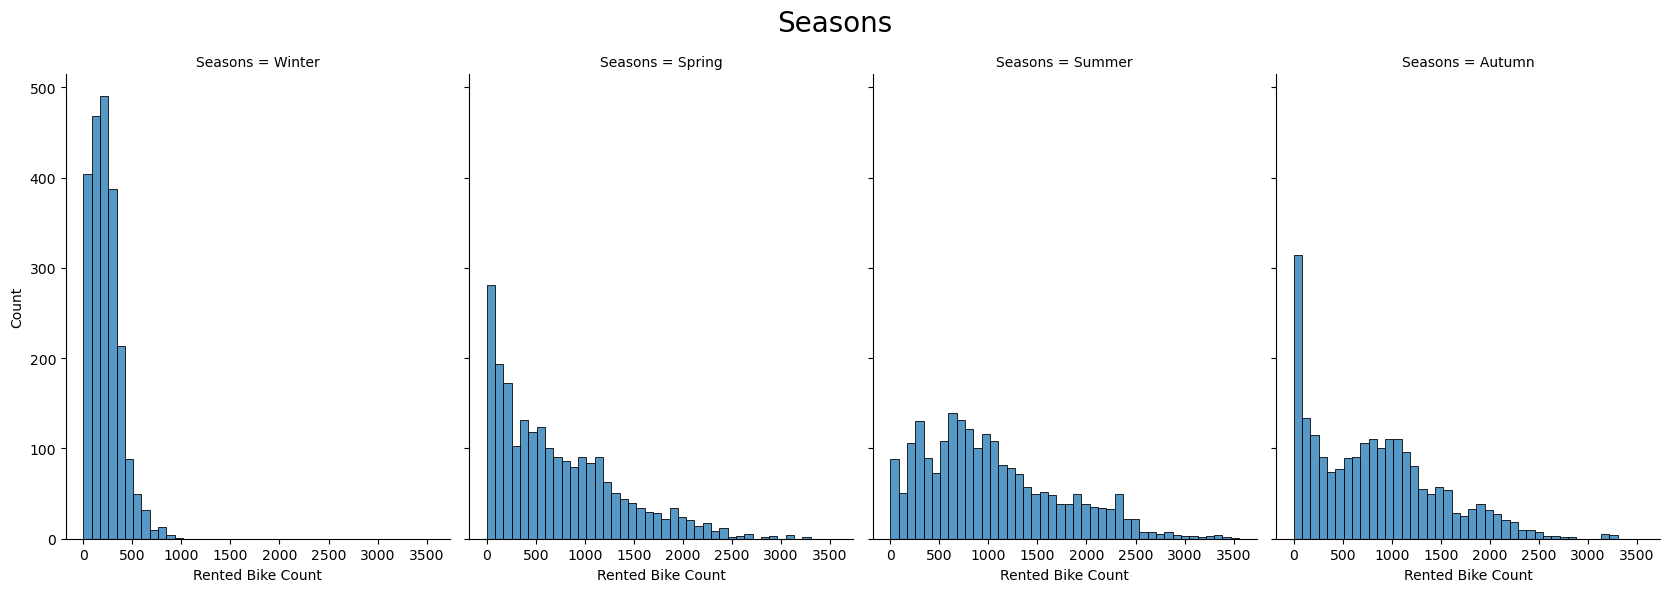

<Figure size 600x600 with 0 Axes>

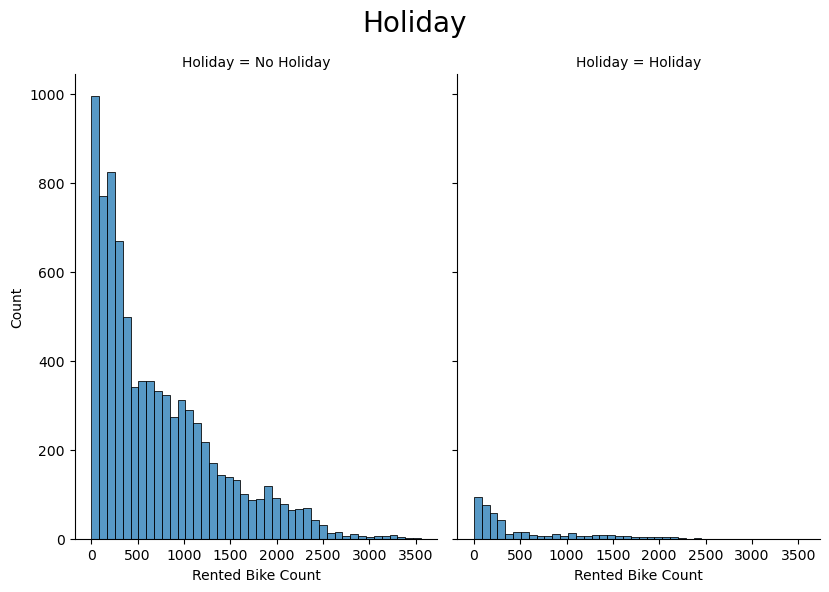

In [34]:
for i in ['Seasons', 'Holiday']:
    plt.figure(figsize=(6, 6)) 
    
    rel = sns.displot(x="Rented Bike Count", data=df, col=i, height=6, aspect=.7)
    rel.fig.suptitle(i, fontsize=20)  
    
    plt.tight_layout()
    
    plt.show()

In [35]:
from itertools import combinations

In [38]:
num_cols

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [39]:
c=list(combinations(num_cols,2))
c

[('Rented Bike Count', 'Temperature(°C)'),
 ('Rented Bike Count', 'Humidity(%)'),
 ('Rented Bike Count', 'Wind speed (m/s)'),
 ('Rented Bike Count', 'Visibility (10m)'),
 ('Rented Bike Count', 'Dew point temperature(°C)'),
 ('Rented Bike Count', 'Solar Radiation (MJ/m2)'),
 ('Rented Bike Count', 'Rainfall(mm)'),
 ('Rented Bike Count', 'Snowfall (cm)'),
 ('Temperature(°C)', 'Humidity(%)'),
 ('Temperature(°C)', 'Wind speed (m/s)'),
 ('Temperature(°C)', 'Visibility (10m)'),
 ('Temperature(°C)', 'Dew point temperature(°C)'),
 ('Temperature(°C)', 'Solar Radiation (MJ/m2)'),
 ('Temperature(°C)', 'Rainfall(mm)'),
 ('Temperature(°C)', 'Snowfall (cm)'),
 ('Humidity(%)', 'Wind speed (m/s)'),
 ('Humidity(%)', 'Visibility (10m)'),
 ('Humidity(%)', 'Dew point temperature(°C)'),
 ('Humidity(%)', 'Solar Radiation (MJ/m2)'),
 ('Humidity(%)', 'Rainfall(mm)'),
 ('Humidity(%)', 'Snowfall (cm)'),
 ('Wind speed (m/s)', 'Visibility (10m)'),
 ('Wind speed (m/s)', 'Dew point temperature(°C)'),
 ('Wind speed (

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


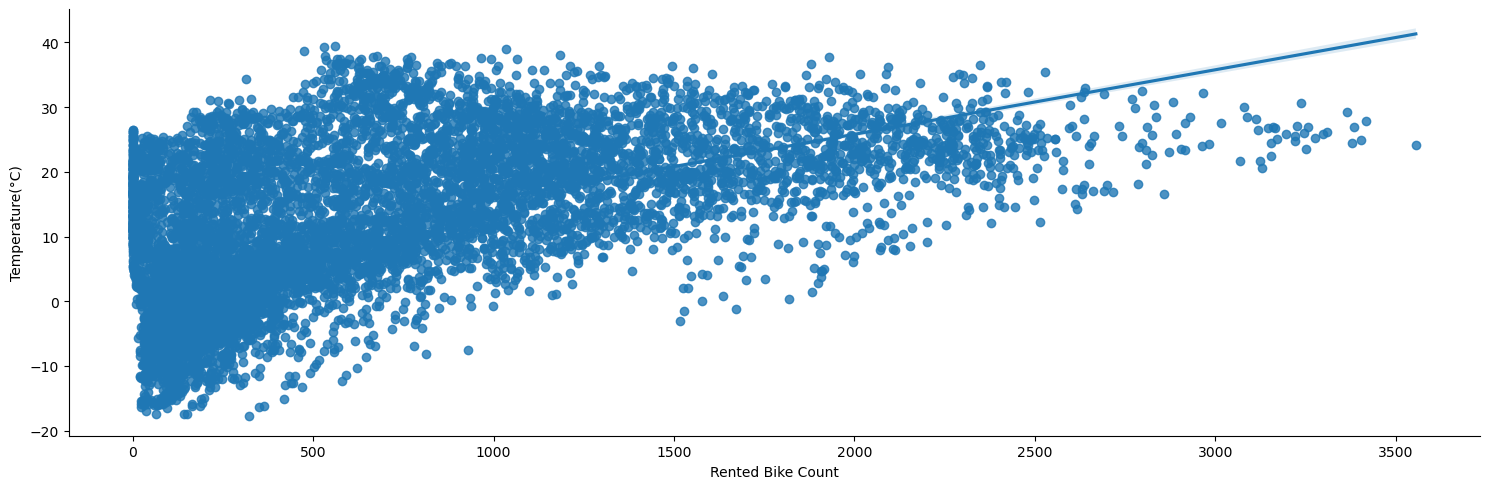

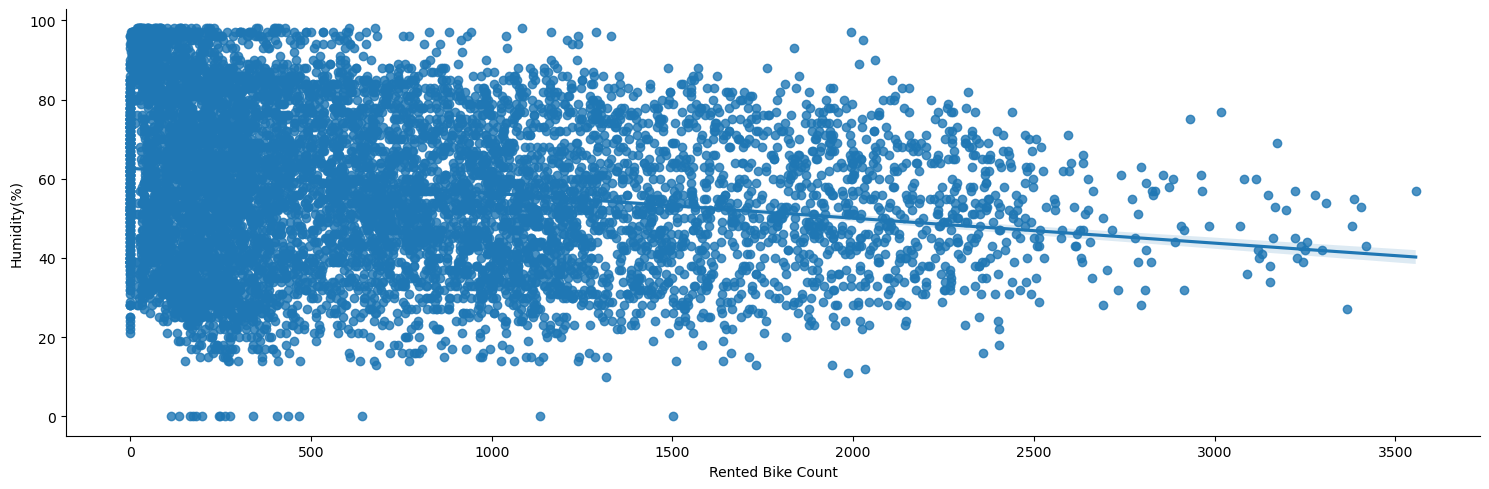

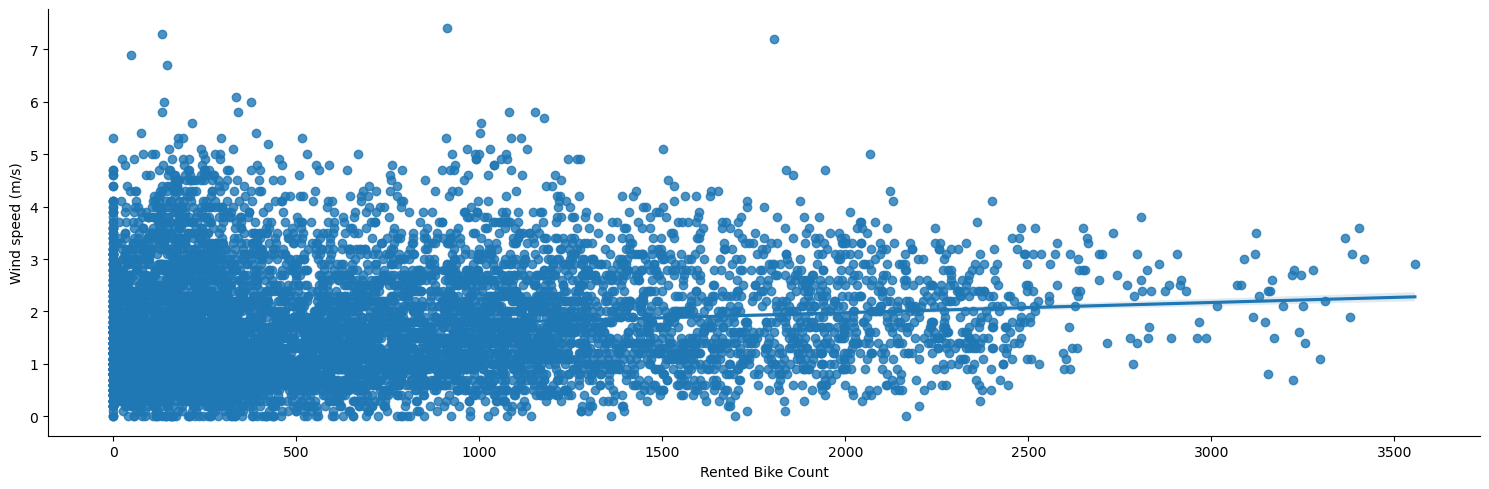

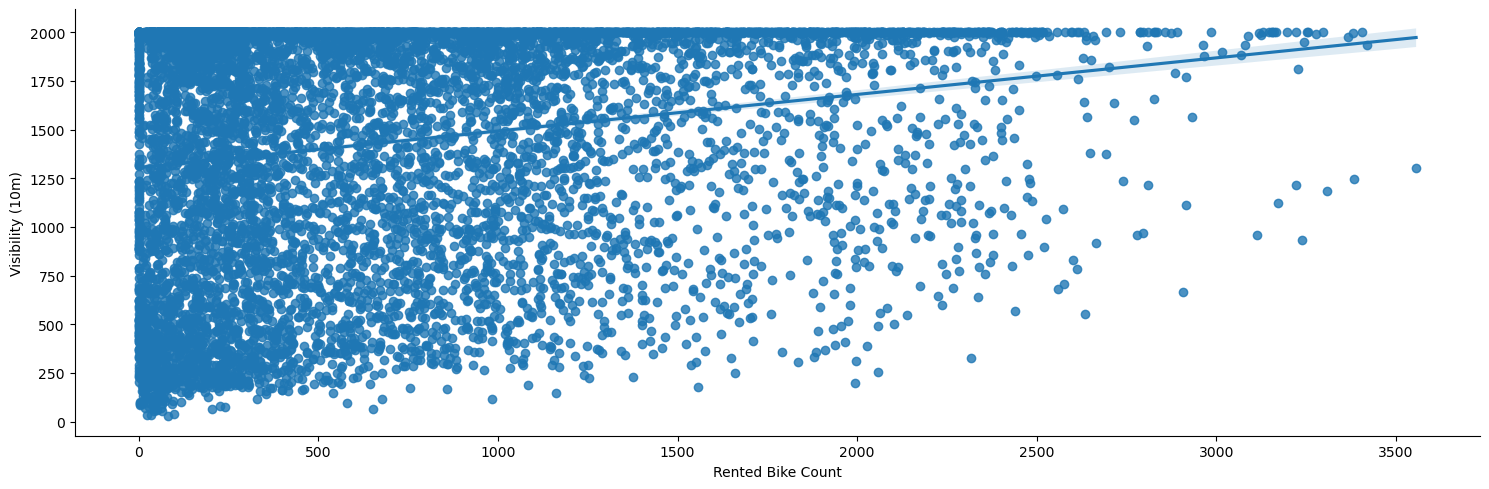

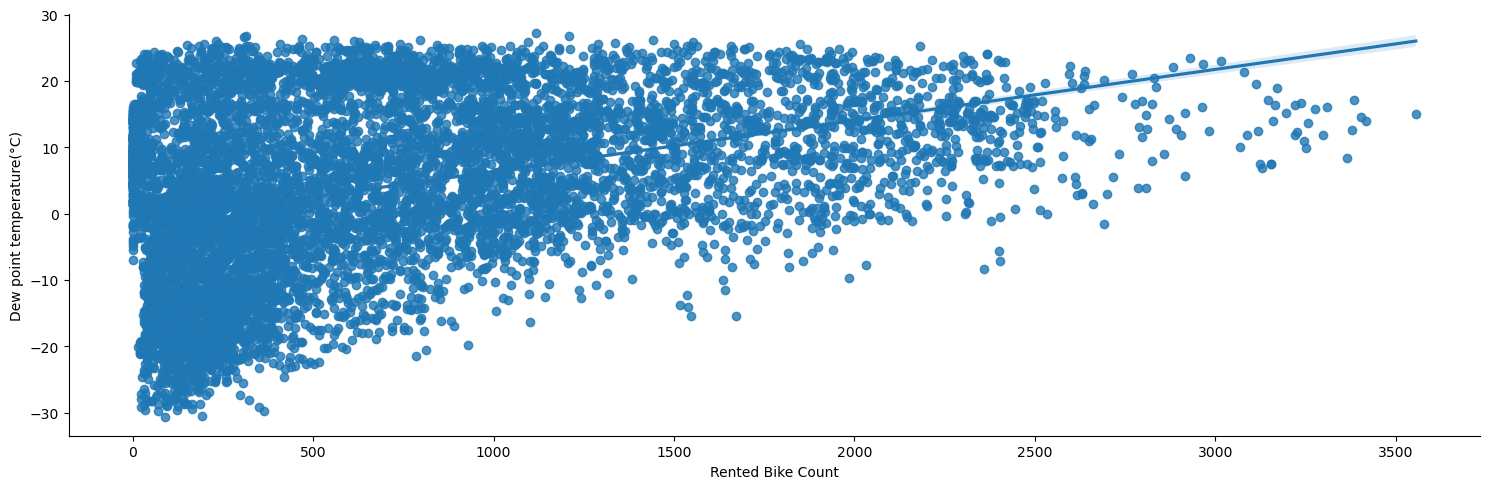

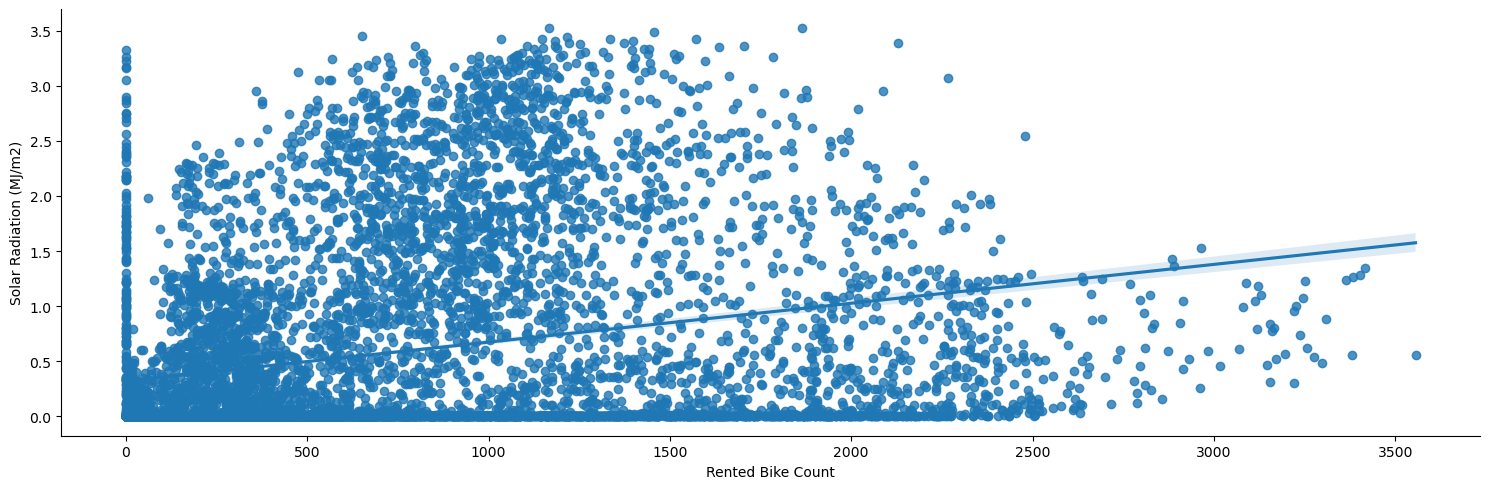

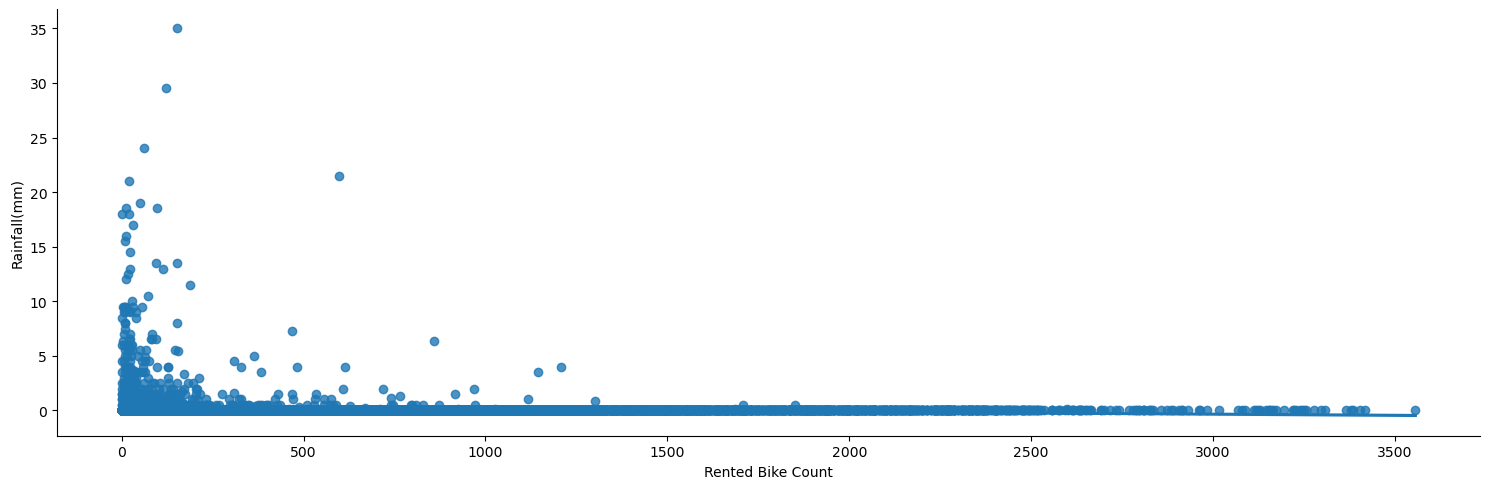

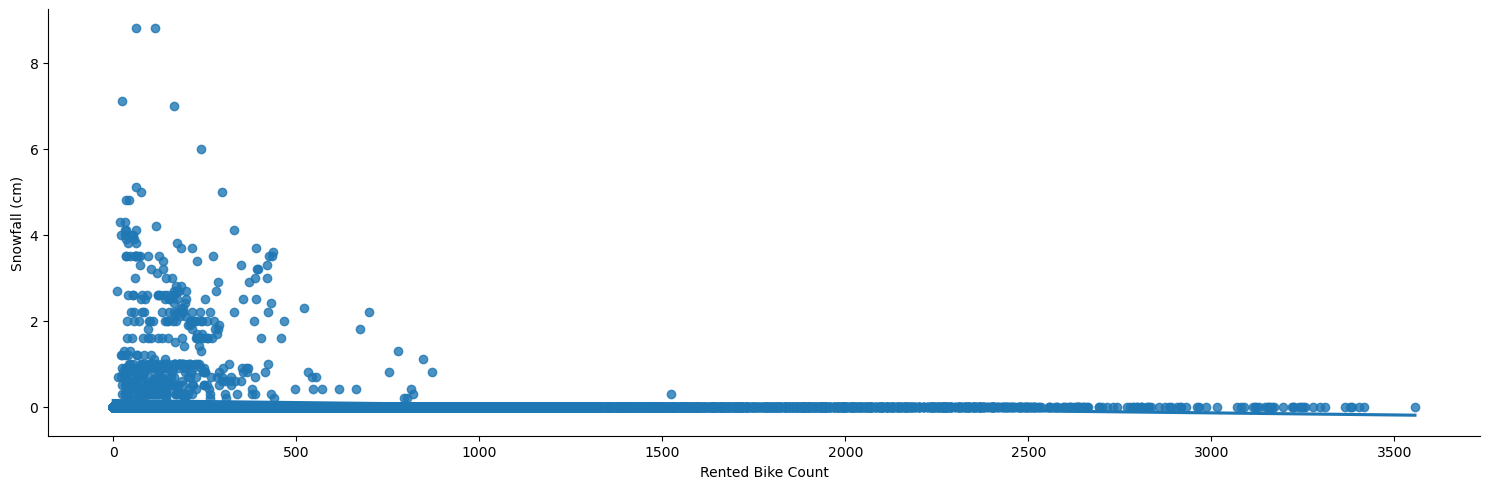

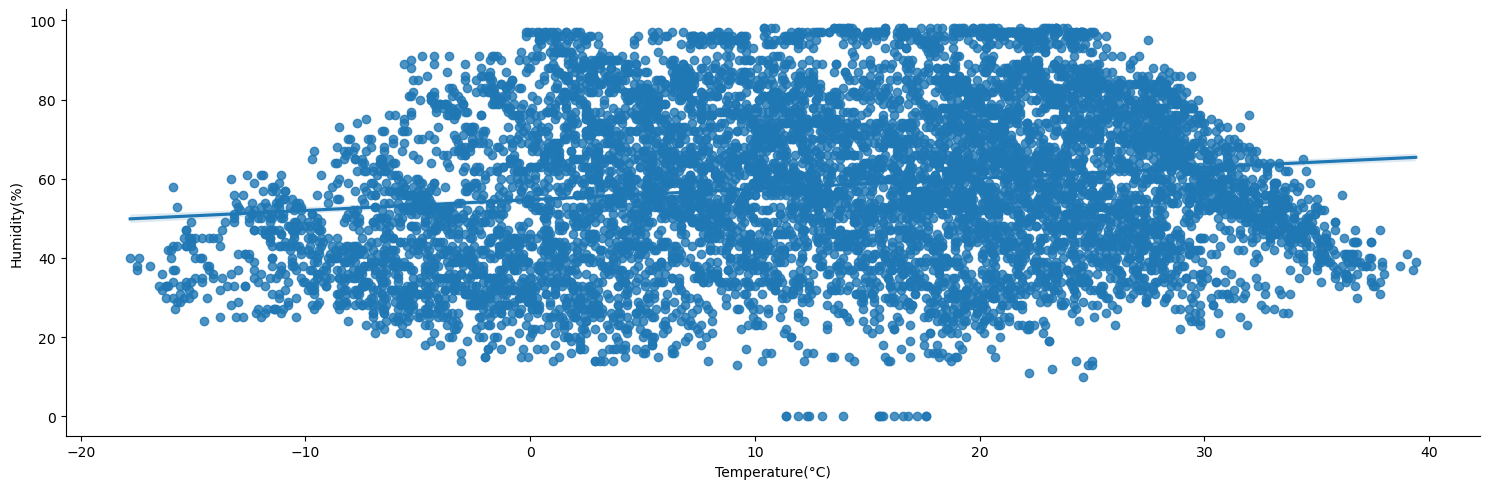

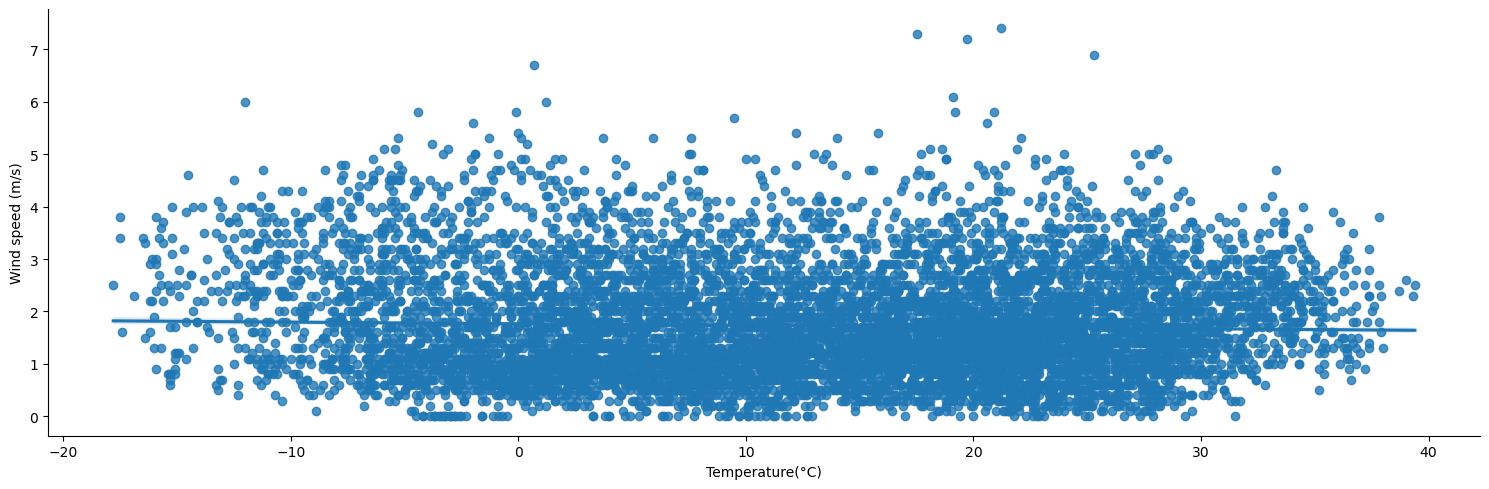

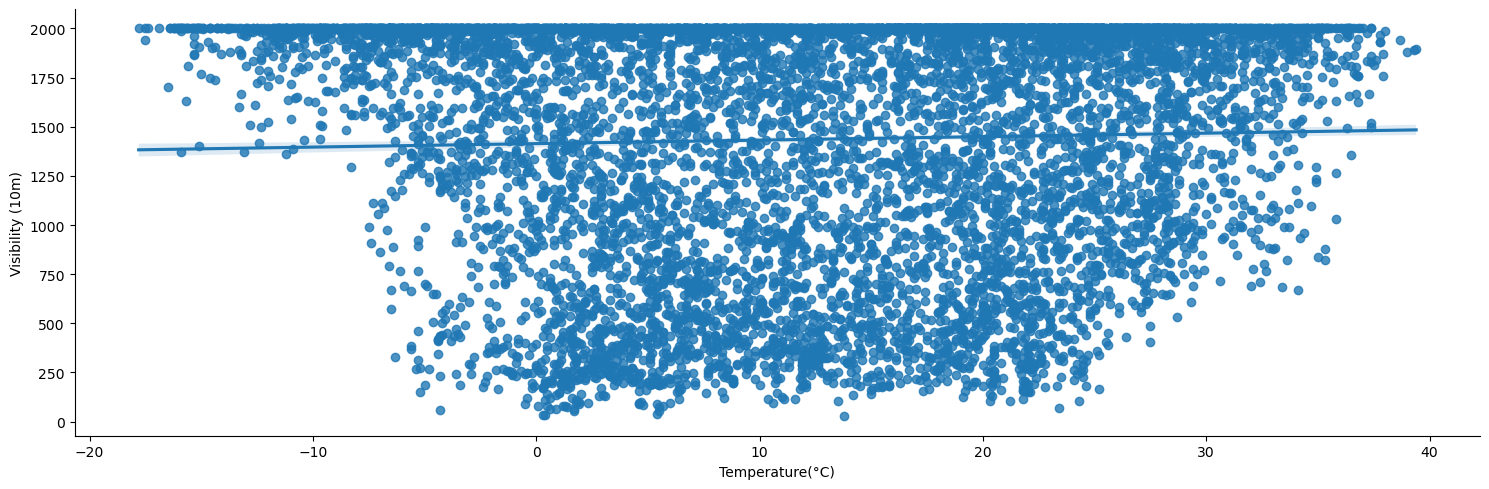

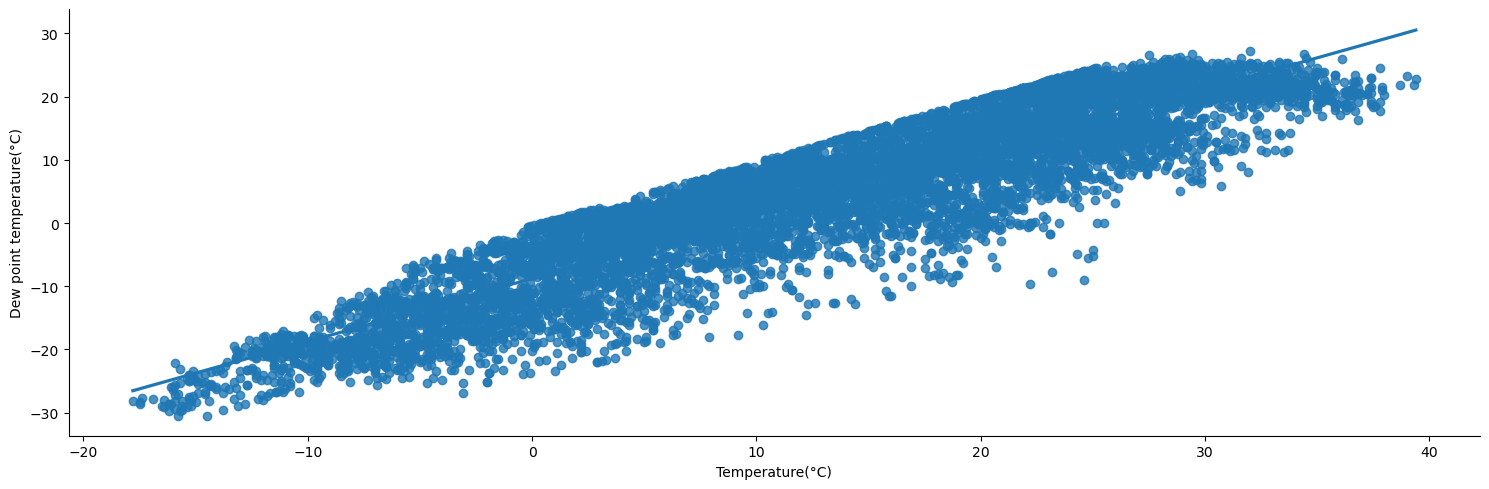

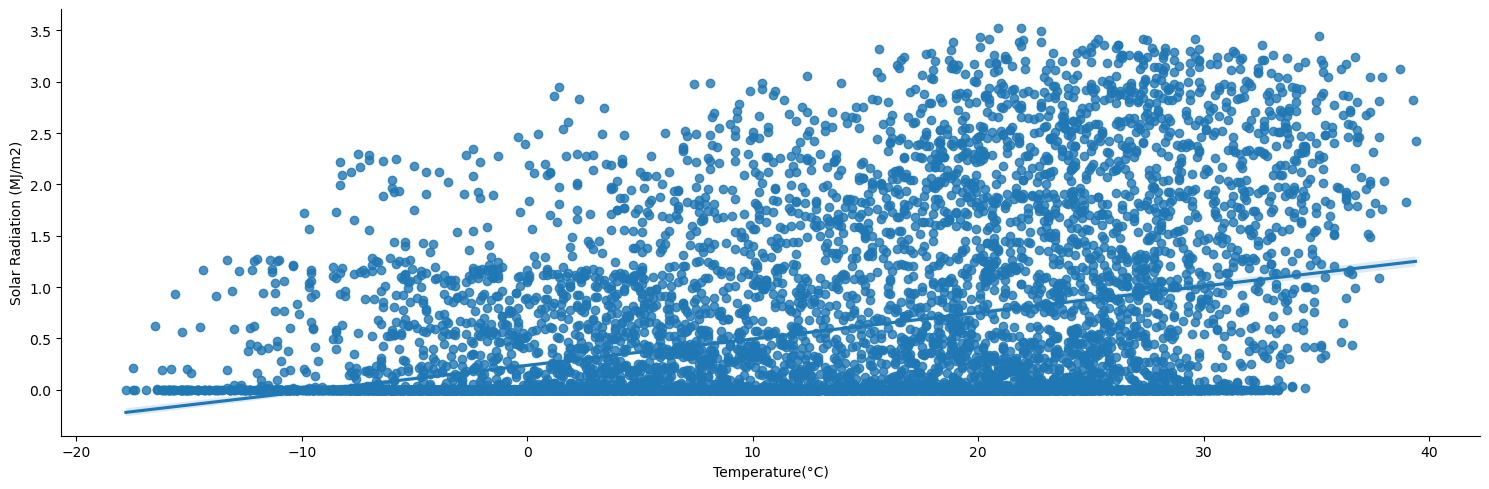

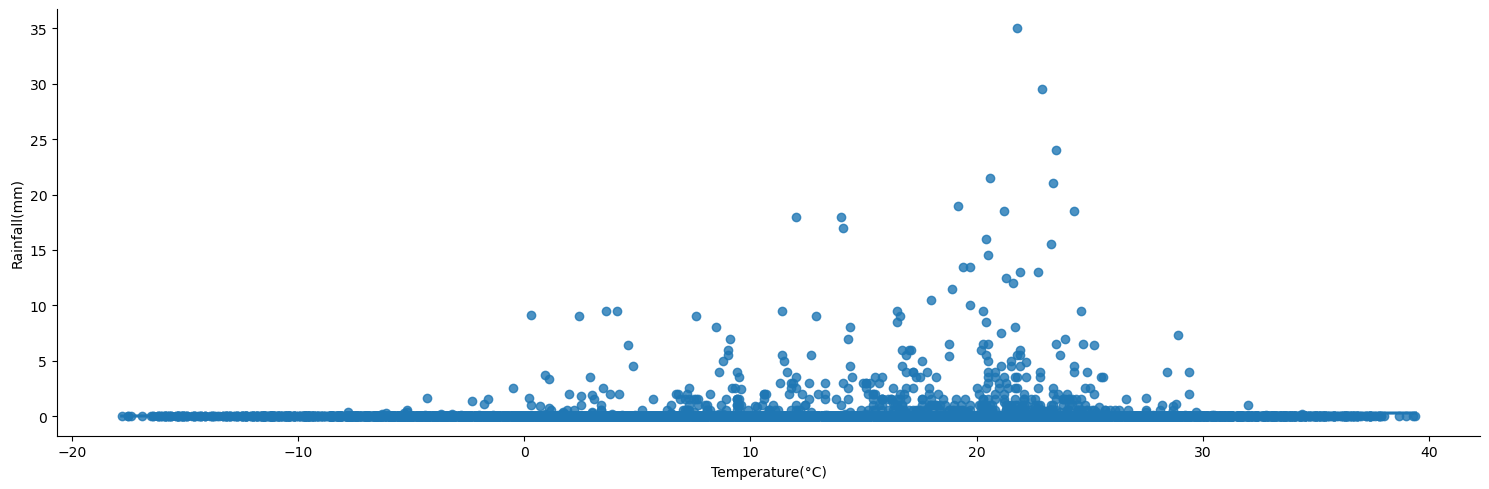

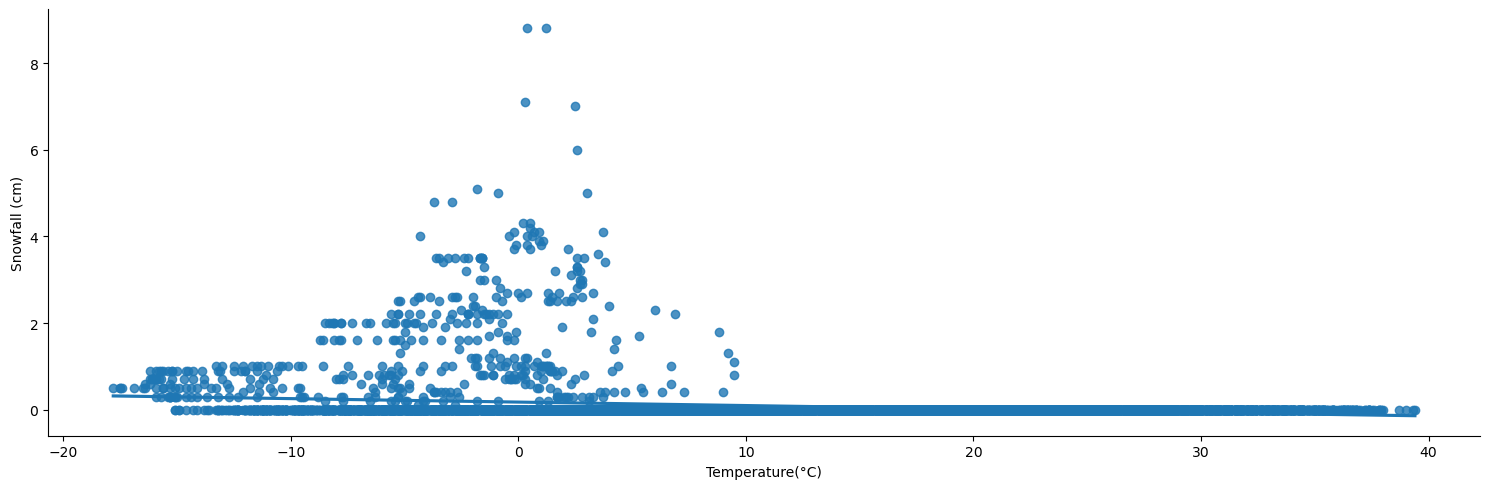

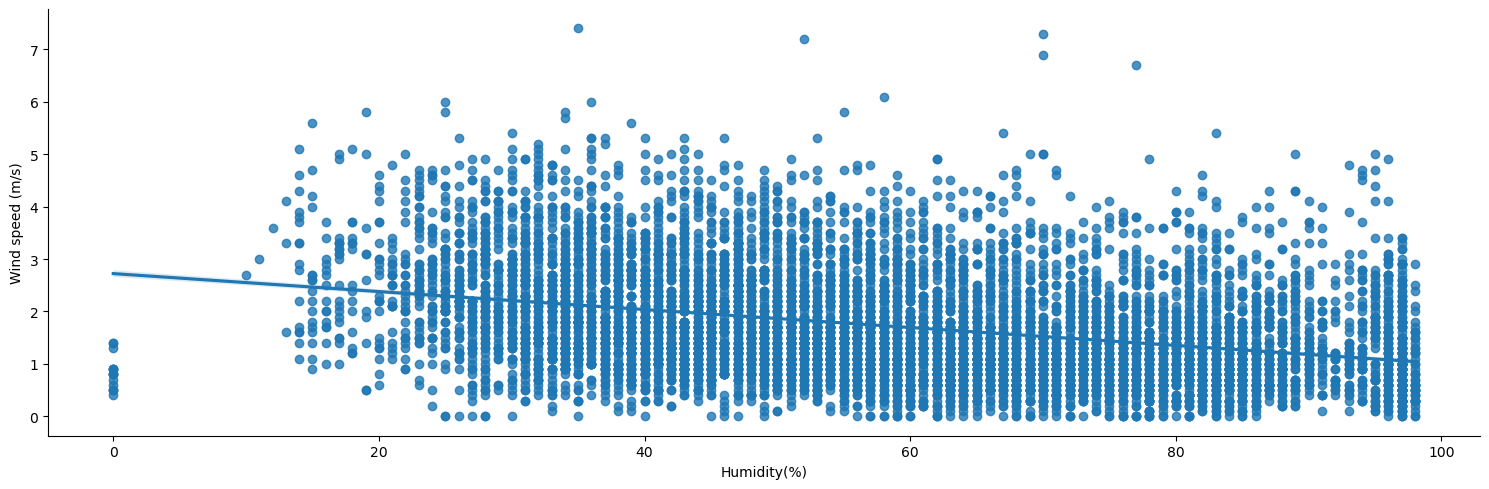

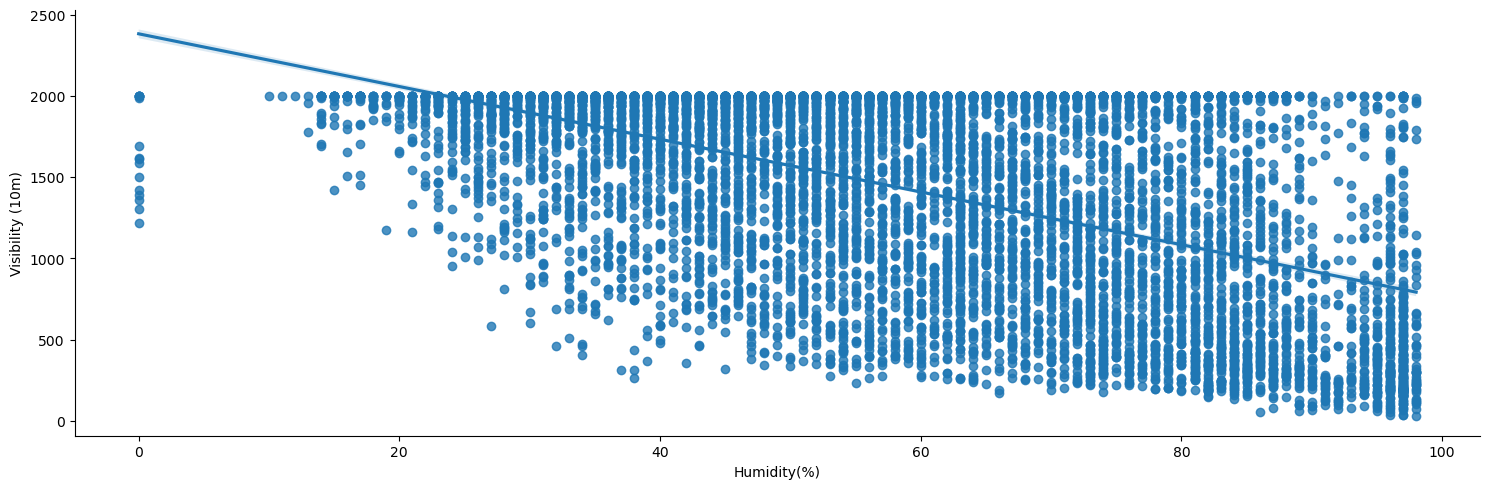

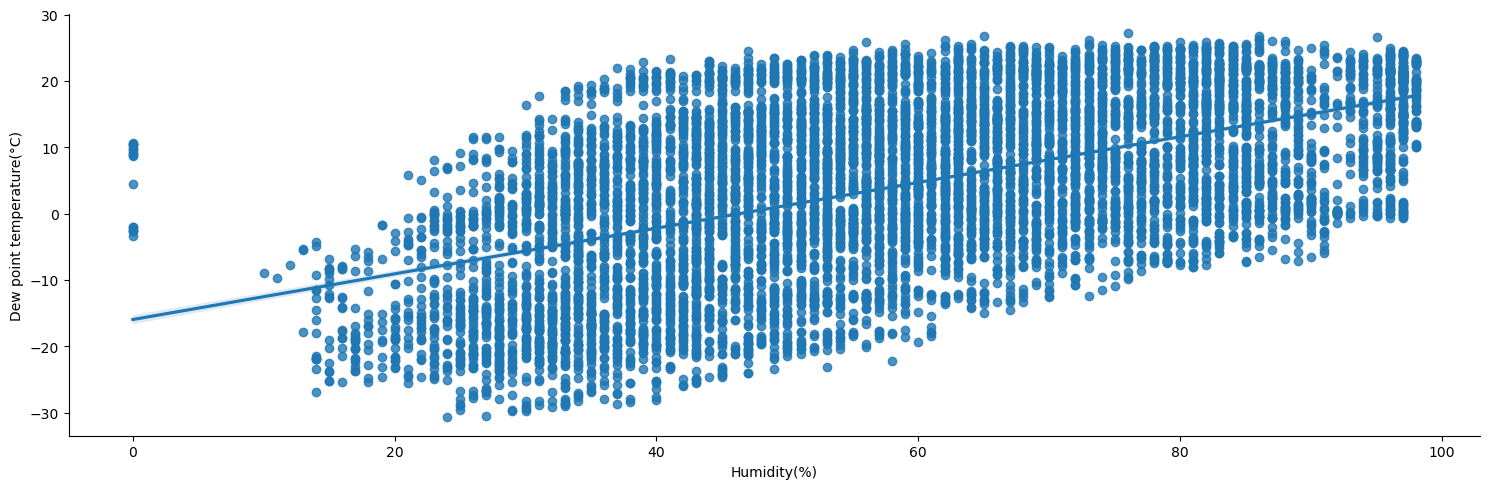

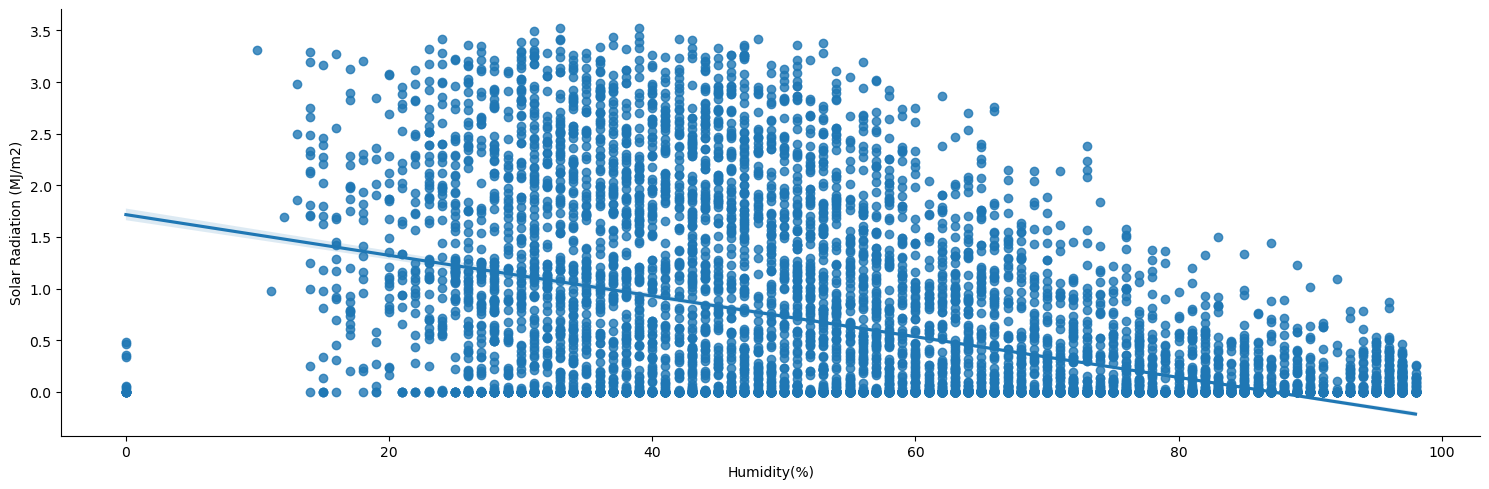

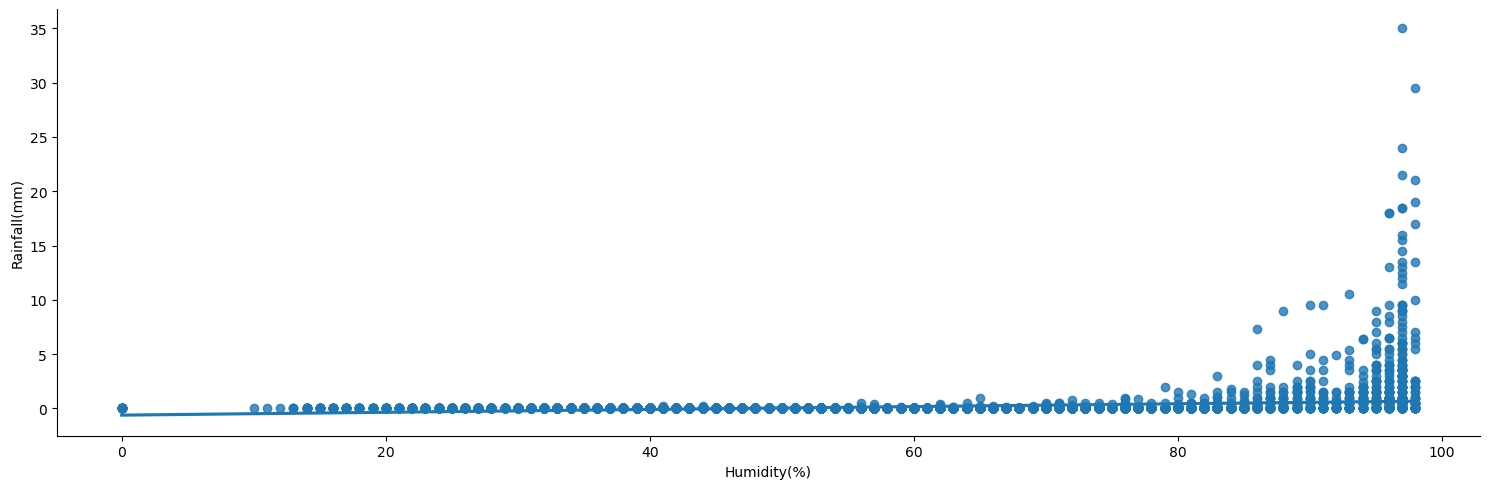

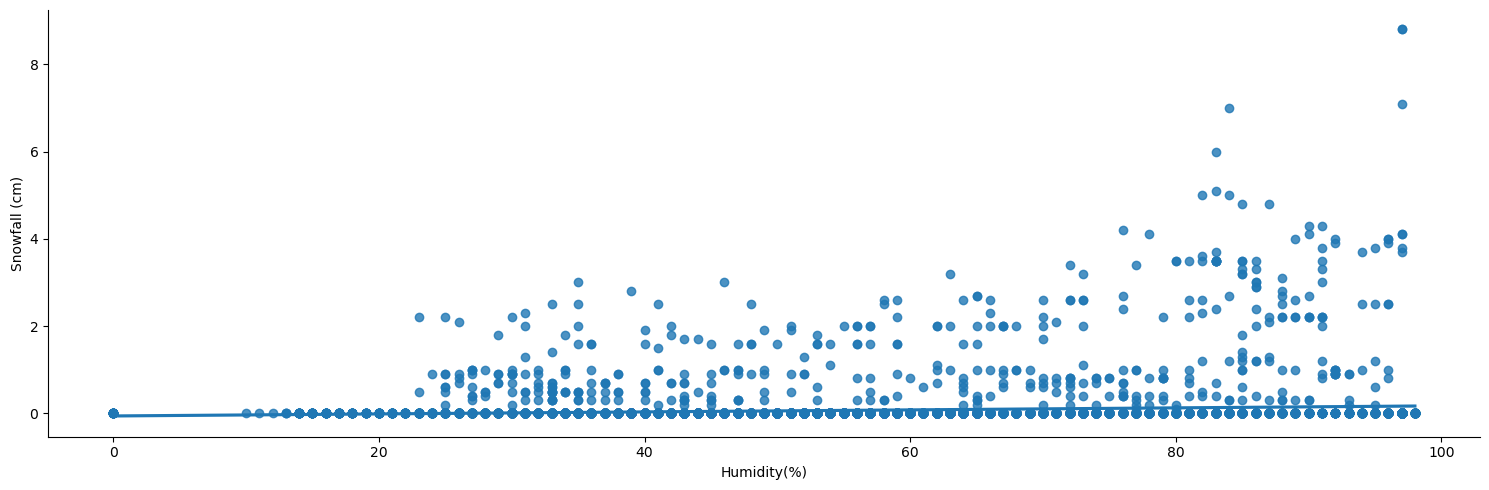

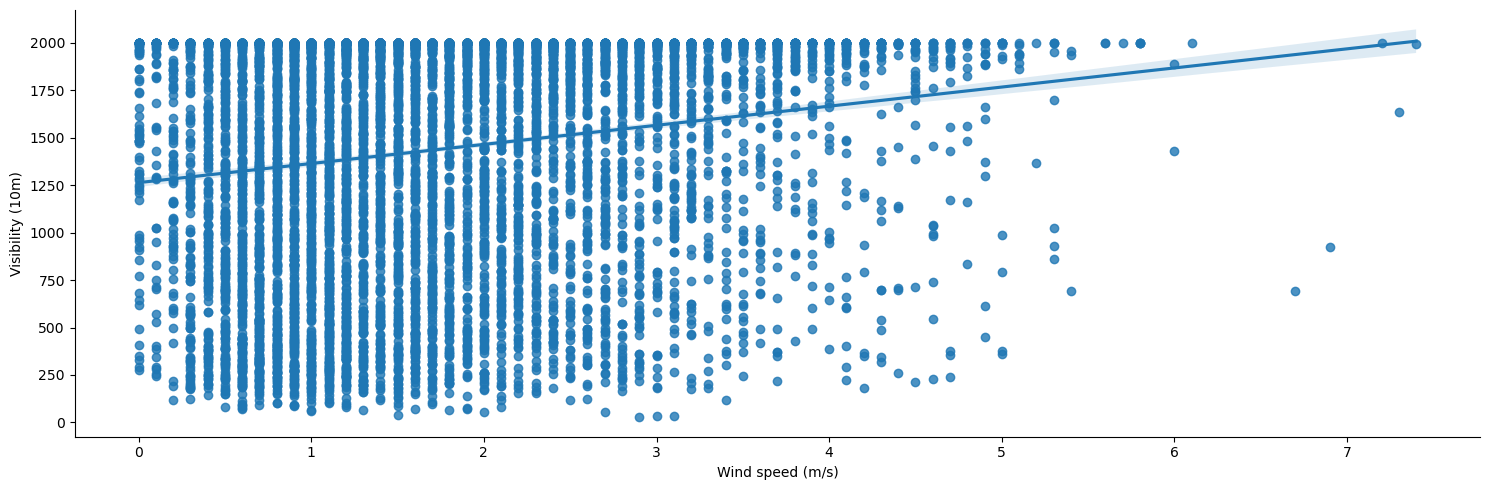

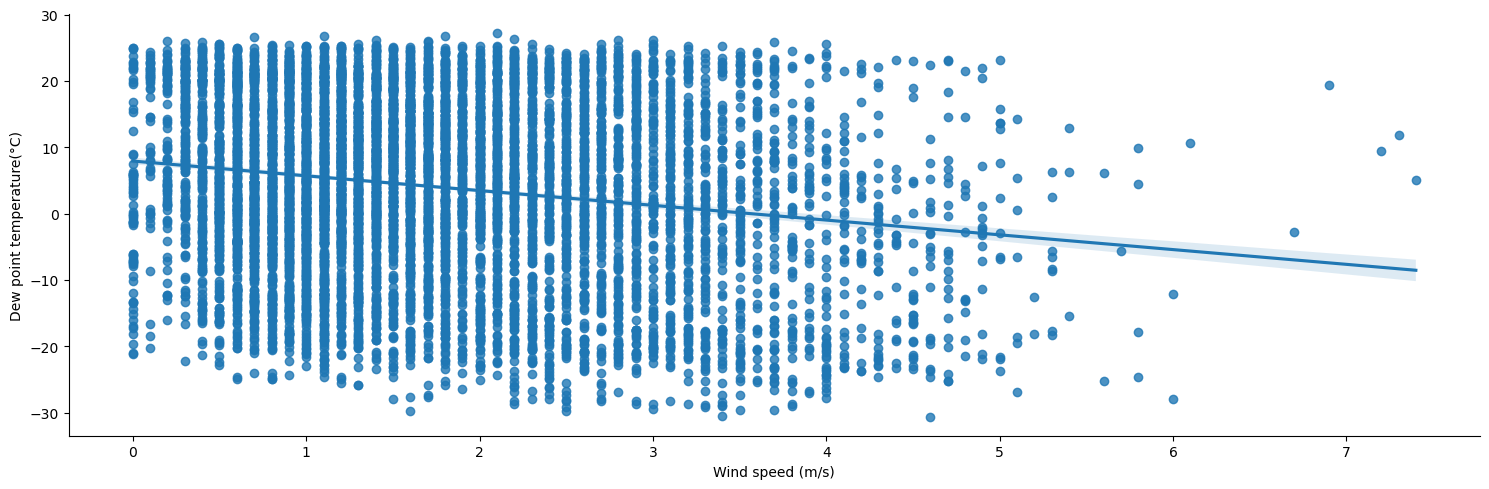

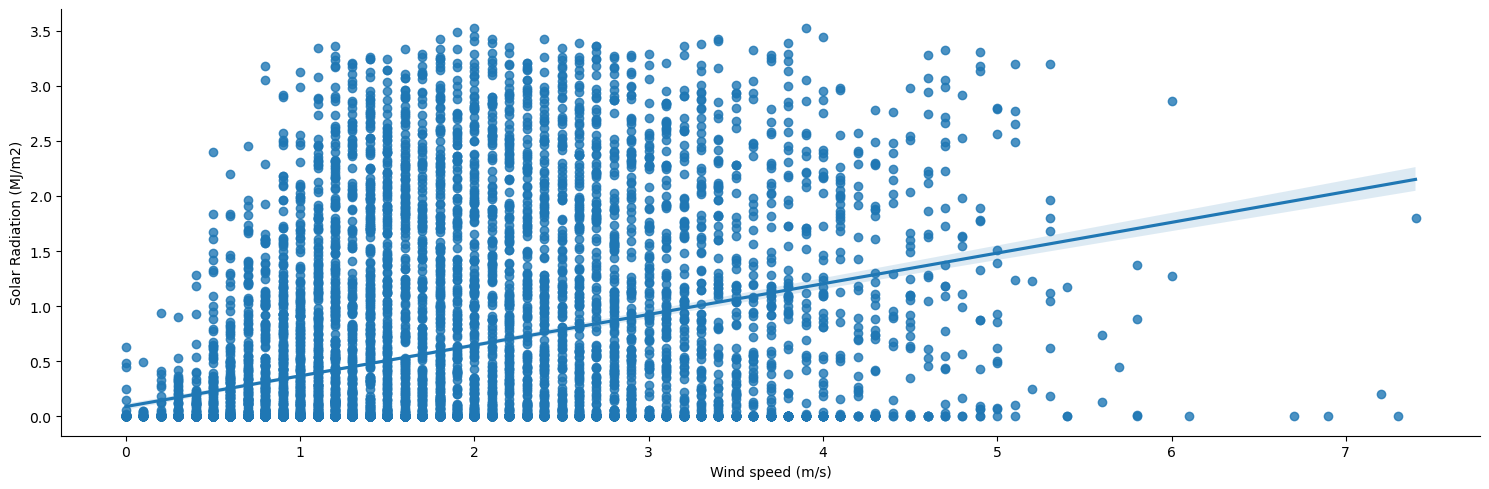

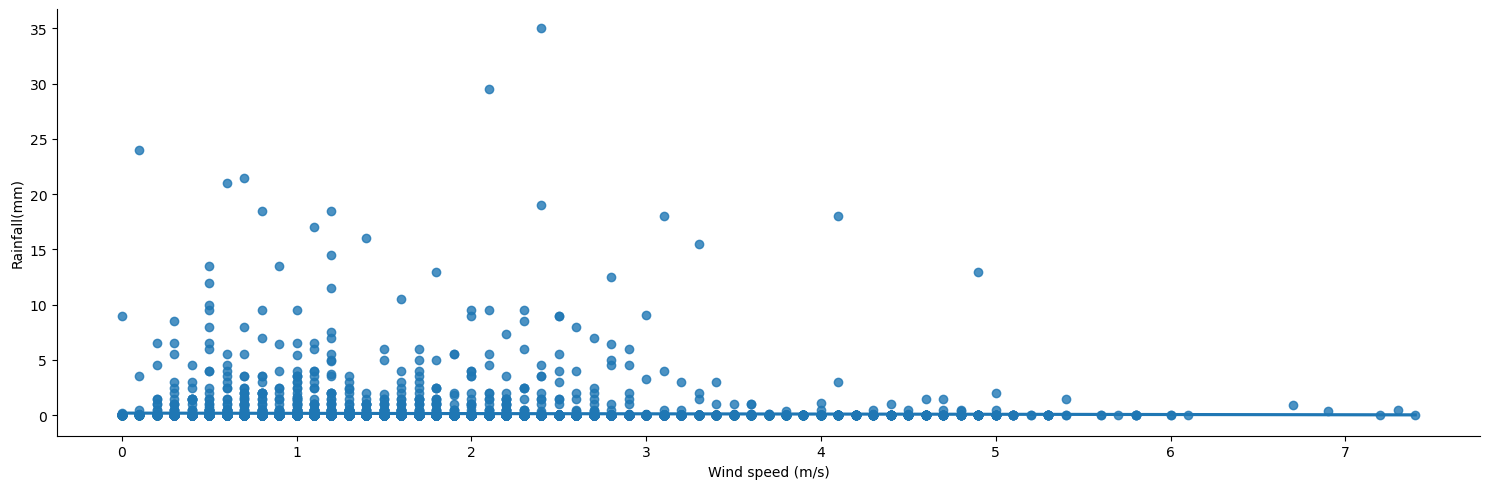

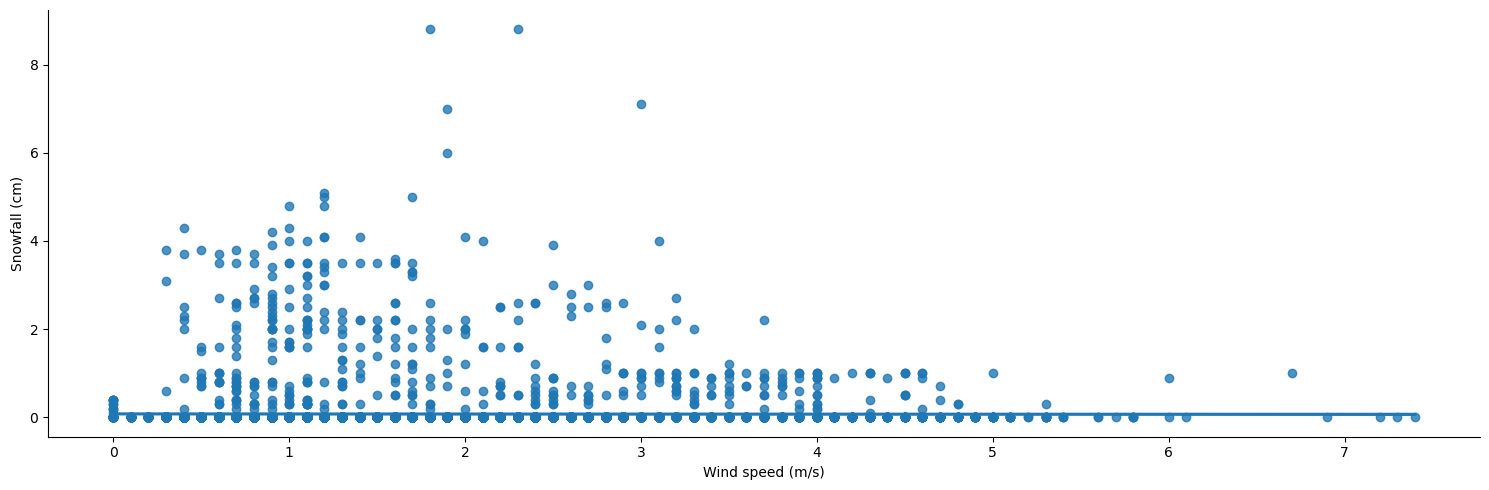

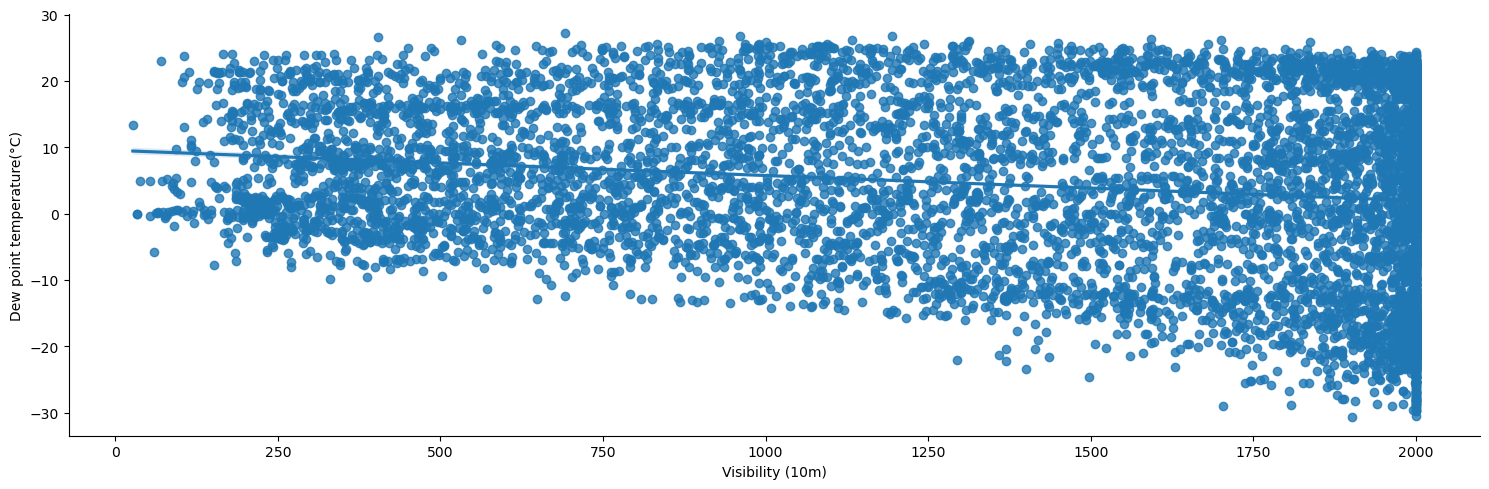

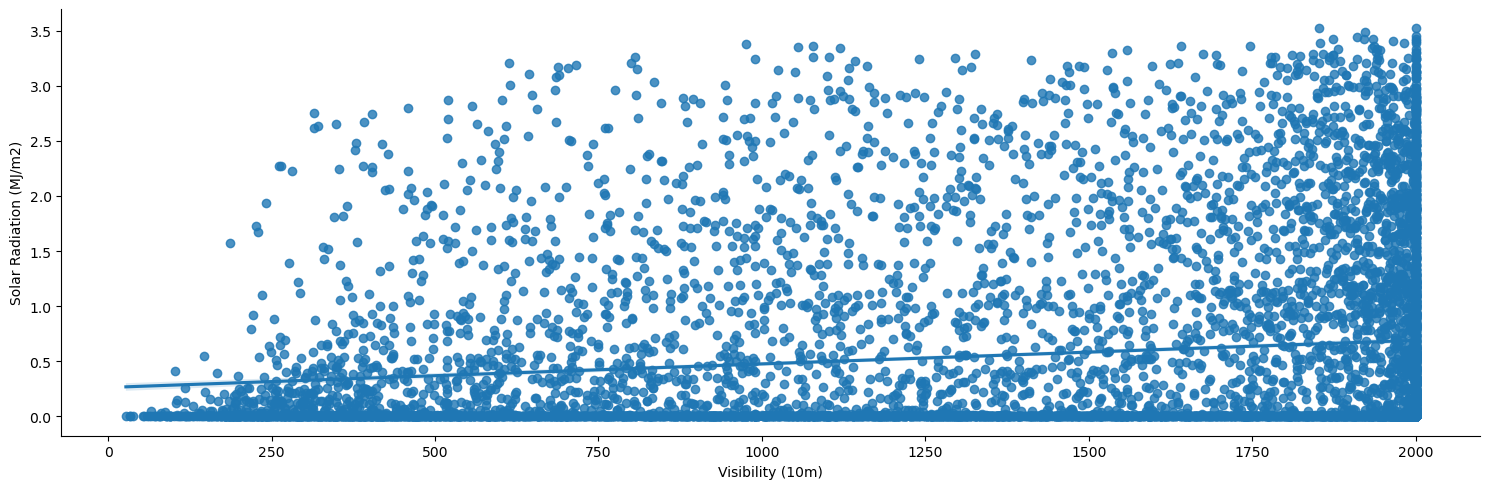

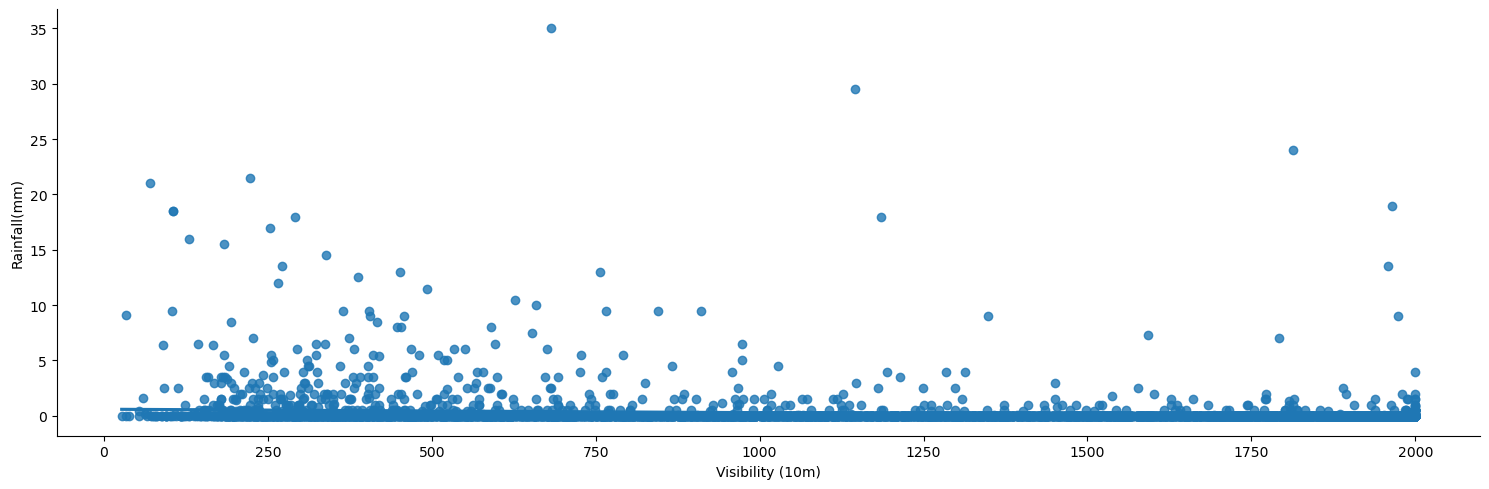

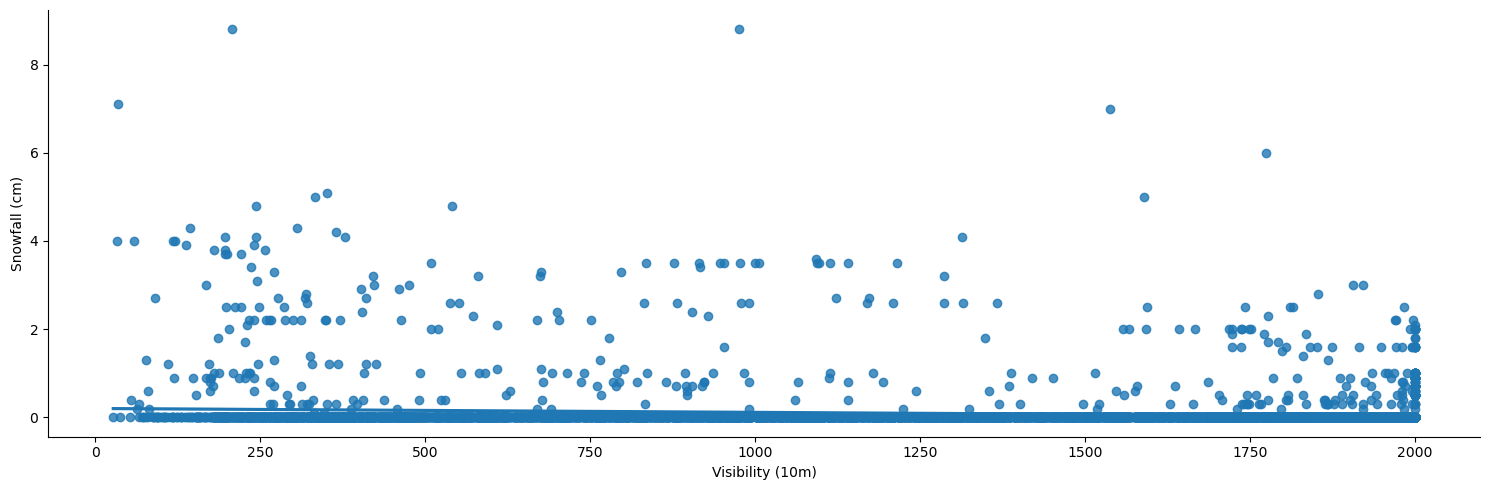

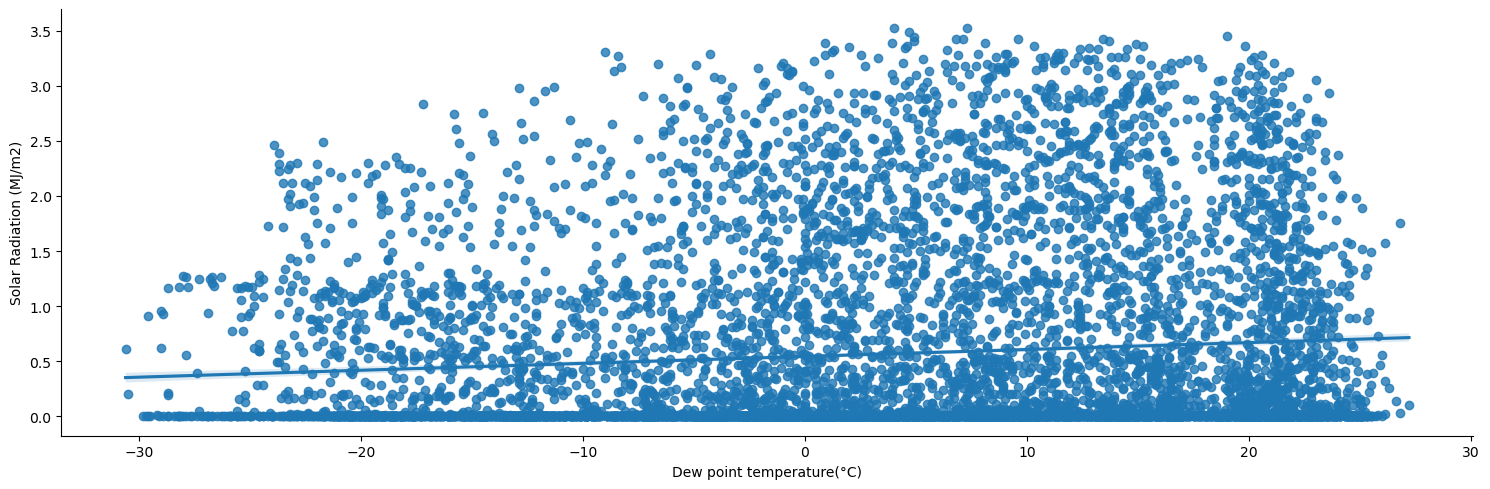

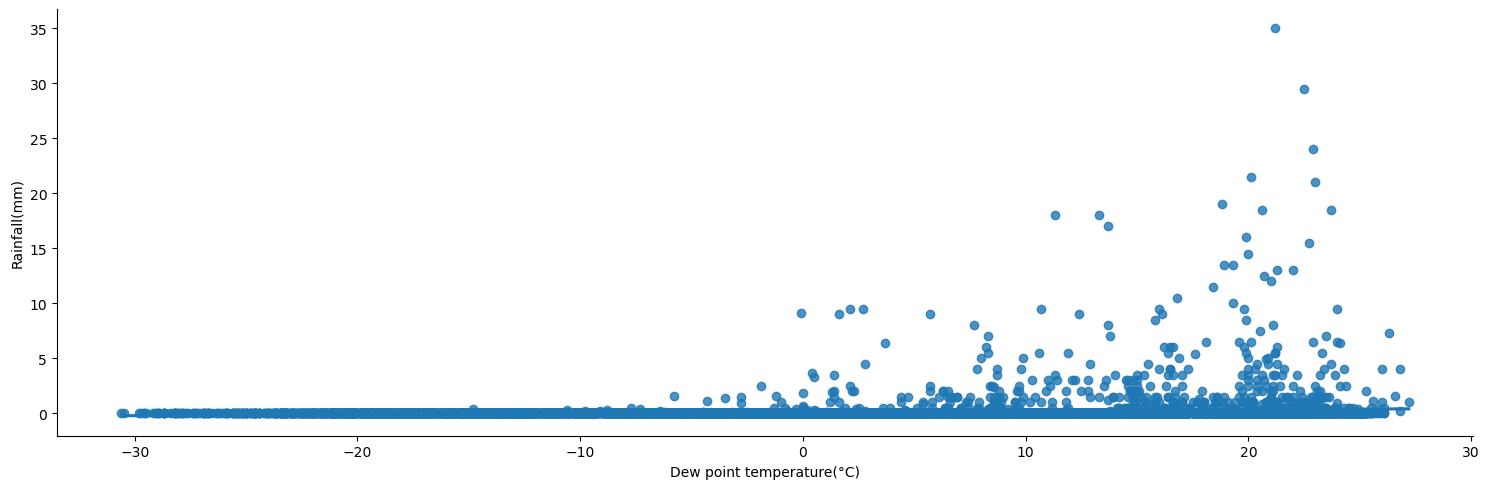

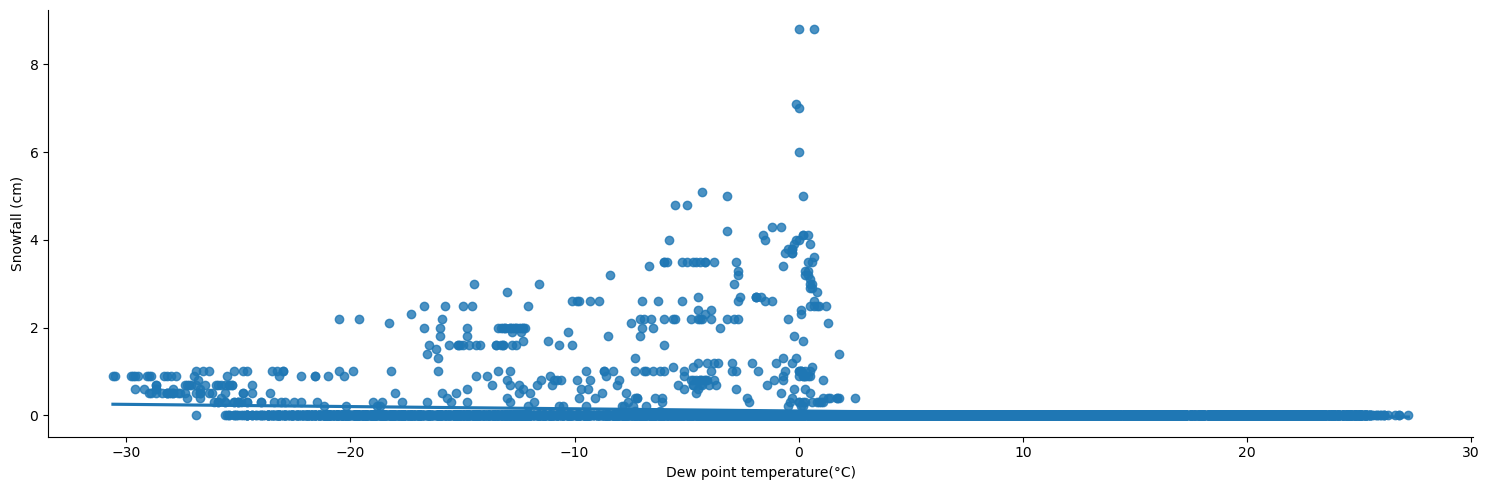

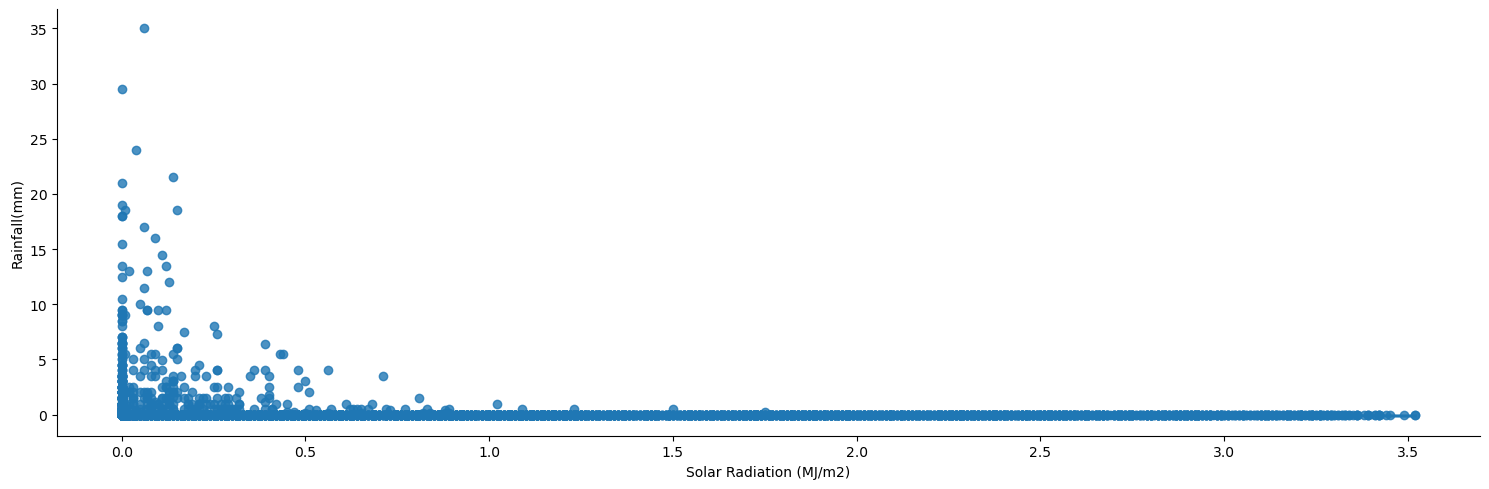

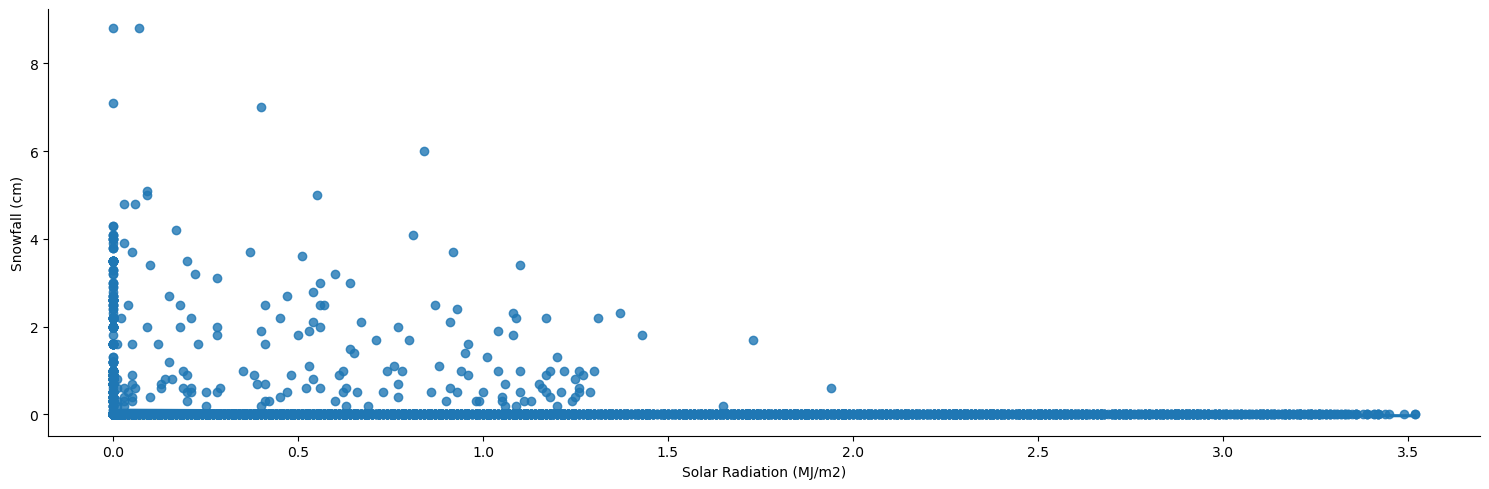

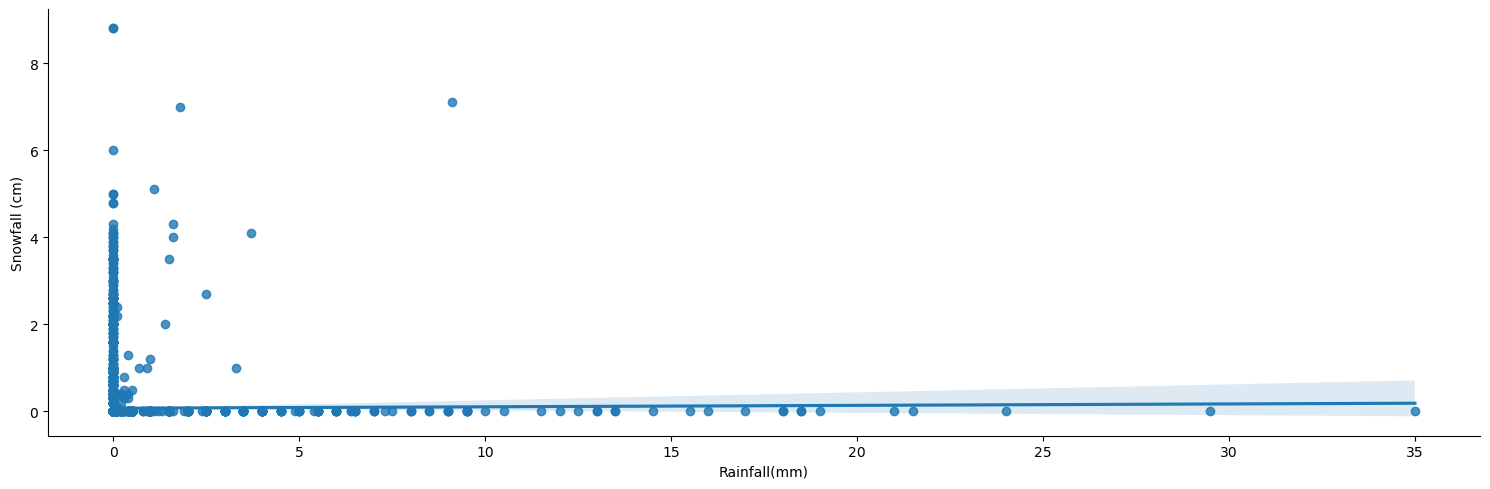

In [41]:
#plotting scatter plot taking 2 continous variables at a time
def scatter(s):
    sns.lmplot(x=s[0],y=s[1],data=df,aspect=3)

for i in c:
    scatter(i)

# DATA TRANSFORMATION 

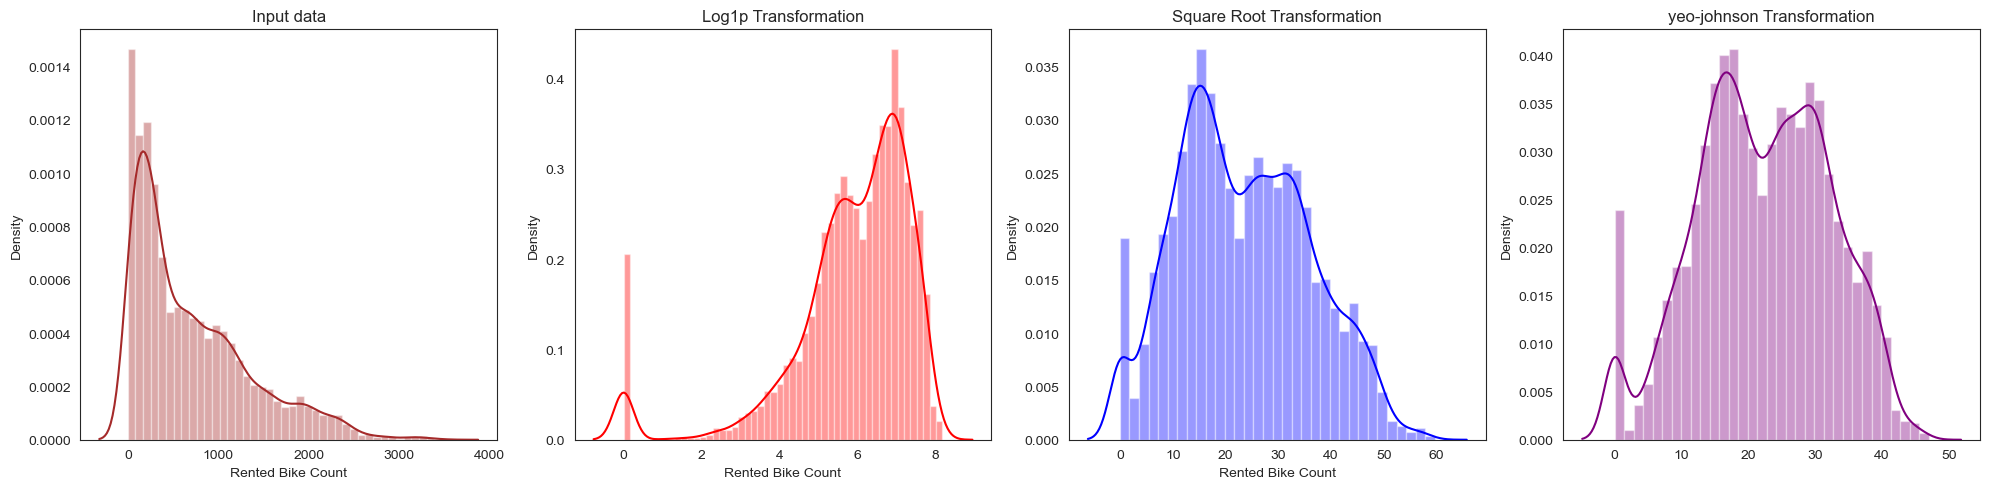

In [47]:
import scipy.stats as stats 
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.distplot(df['Rented Bike Count'], ax=axes[0], color='brown')
axes[0].set_title("Input data")

sns.distplot(np.log1p(df['Rented Bike Count'] + 0.000001), ax=axes[1], color='red')
axes[1].set_title("Log1p Transformation")

sns.distplot(np.sqrt(df['Rented Bike Count']), ax=axes[2], color='blue')
axes[2].set_title("Square Root Transformation")

sns.distplot(stats.yeojohnson(df['Rented Bike Count'])[0], ax=axes[3], color='purple')
axes[3].set_title("yeo-johnson Transformation")

plt.tight_layout()
plt.show()

In [48]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[num_cols]=sc_X.fit_transform(df[num_cols])

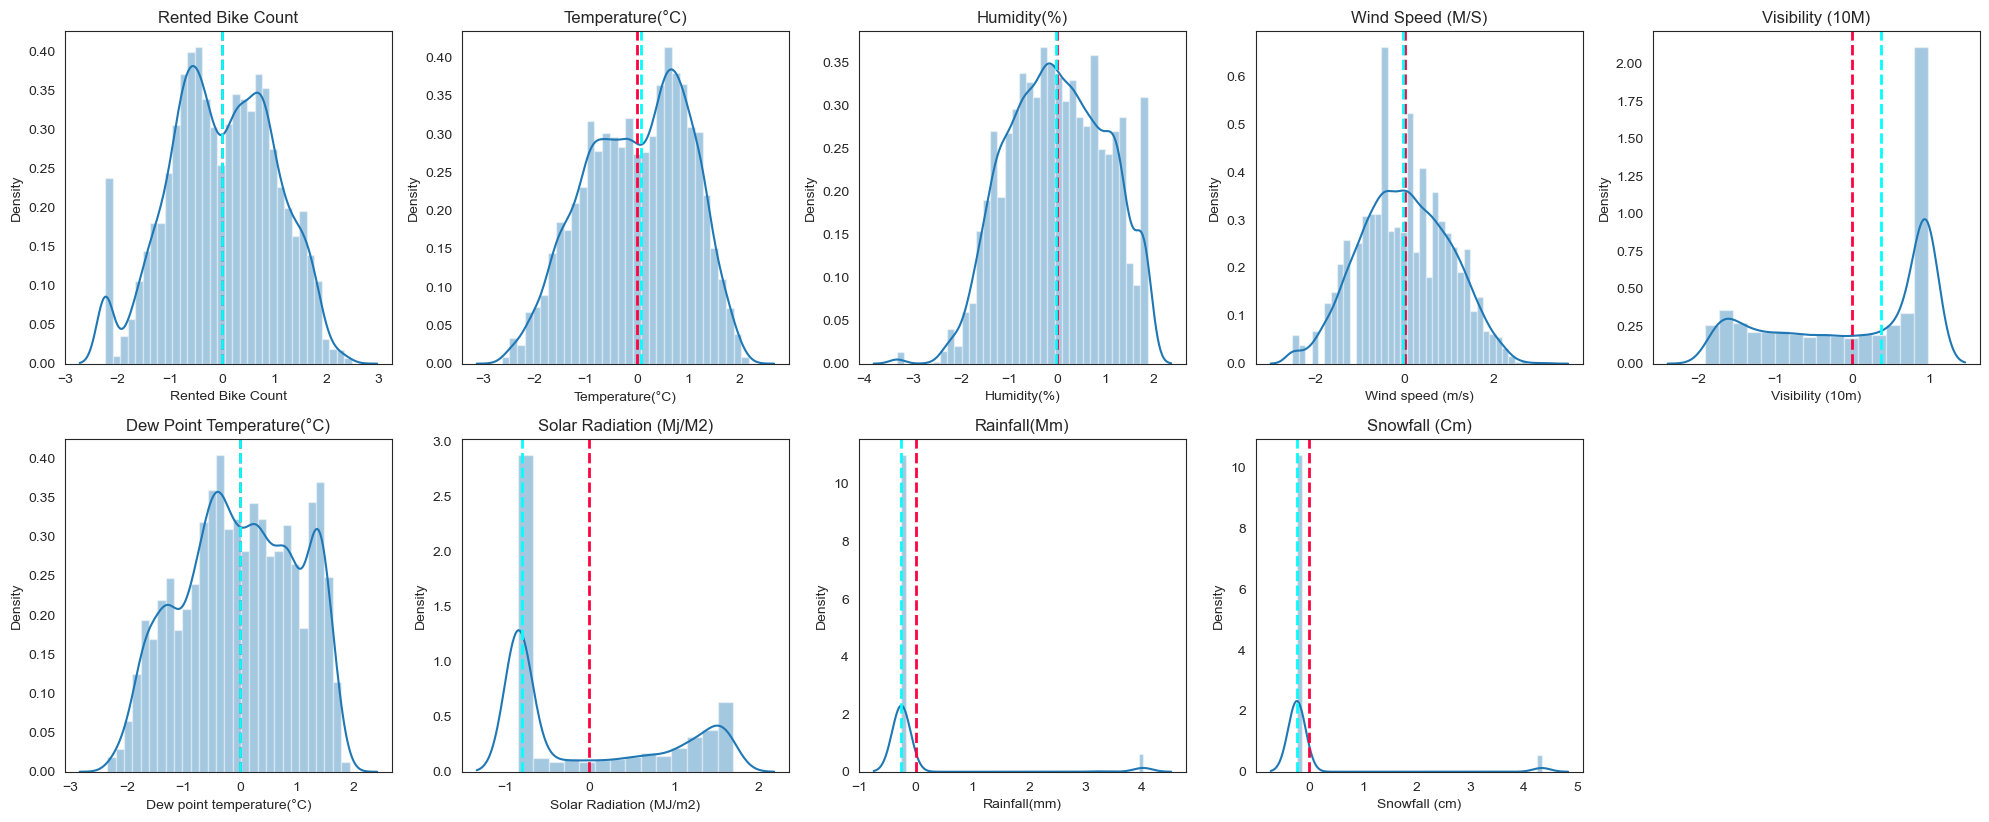

In [49]:
#plot num data to analysis data distribution
fig = plt.figure(figsize = (20,12))
for index,column in enumerate(num_cols) :
  plt.subplot(3,5,index+1)
  sns.distplot(df[column])
  feature = df[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}')
  plt.tight_layout()

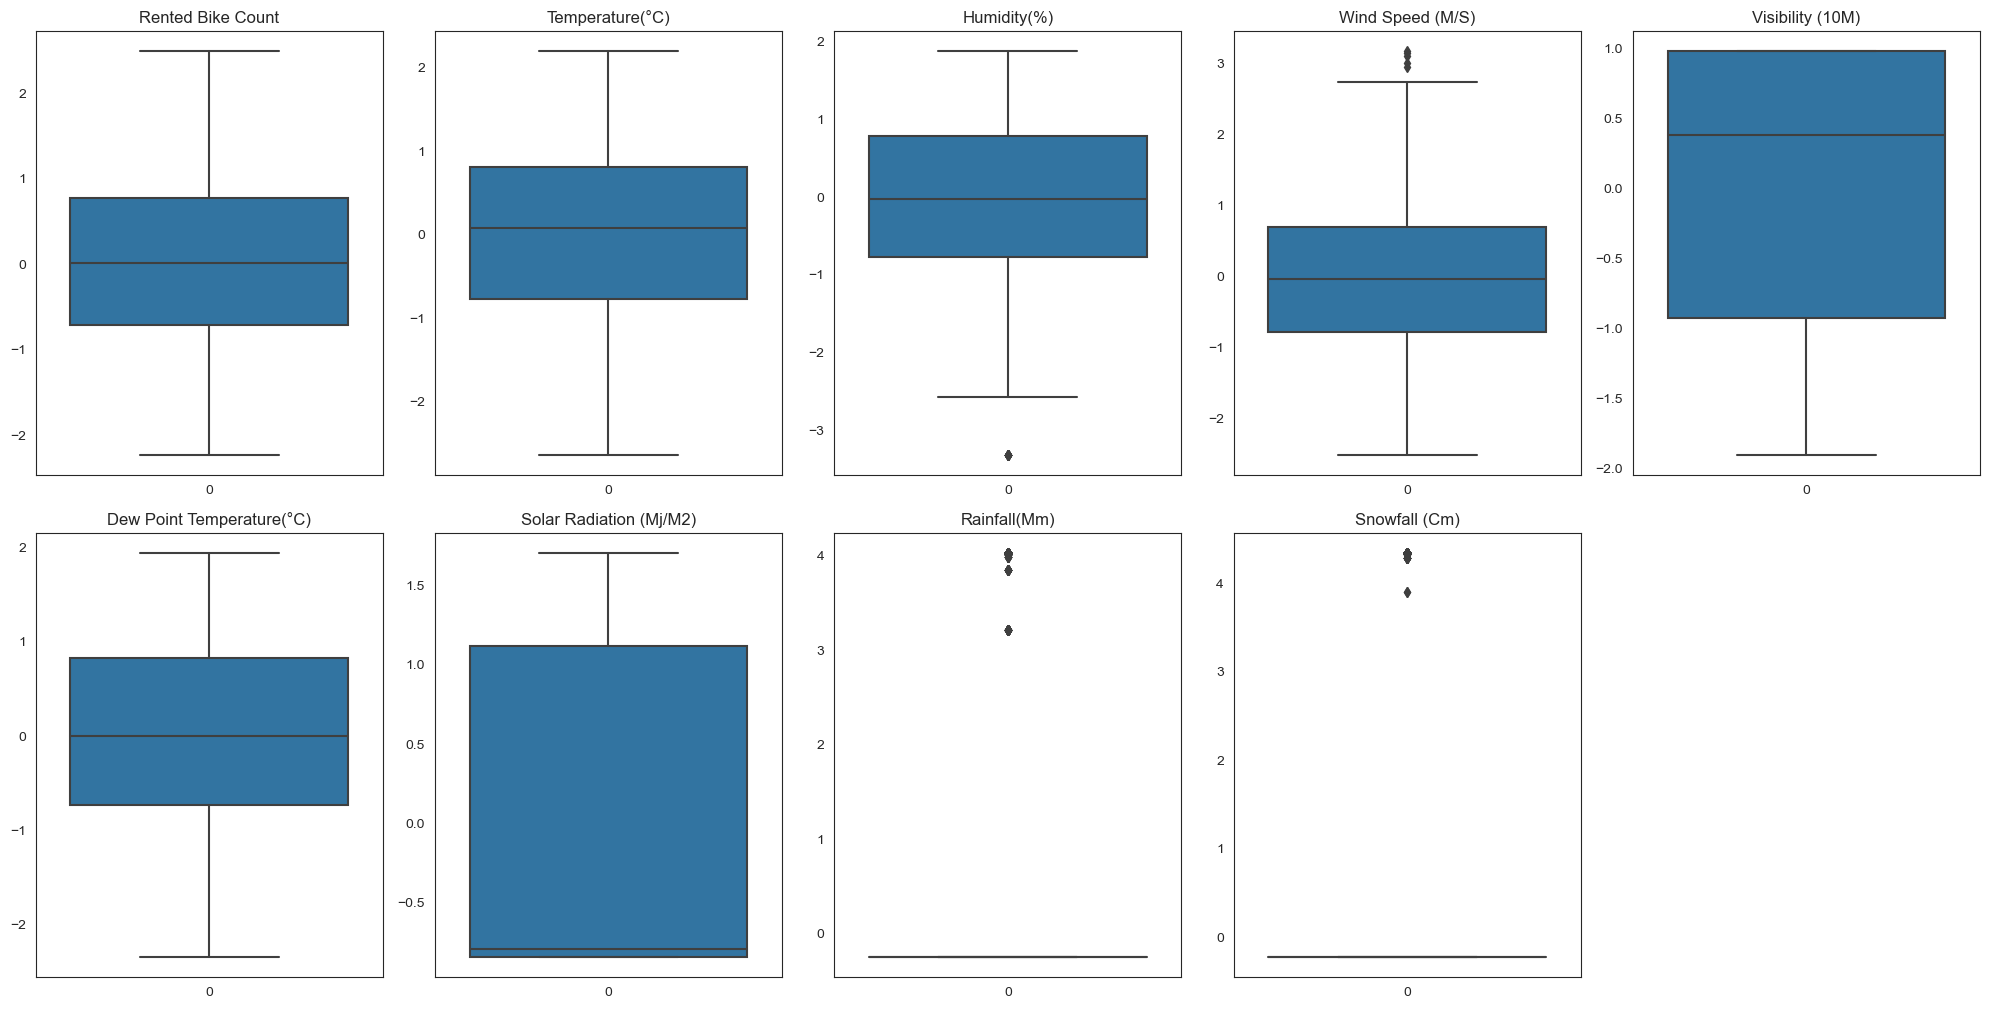

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 15))
for index, column in enumerate(num_cols):
    plt.subplot(3, 5, index + 1)
    sns.boxplot(data=df[column])
    plt.title(f'{column.title()}')
    plt.tight_layout()

plt.show()

# CHECKING MULTICOLLINEARITY

<AxesSubplot:>

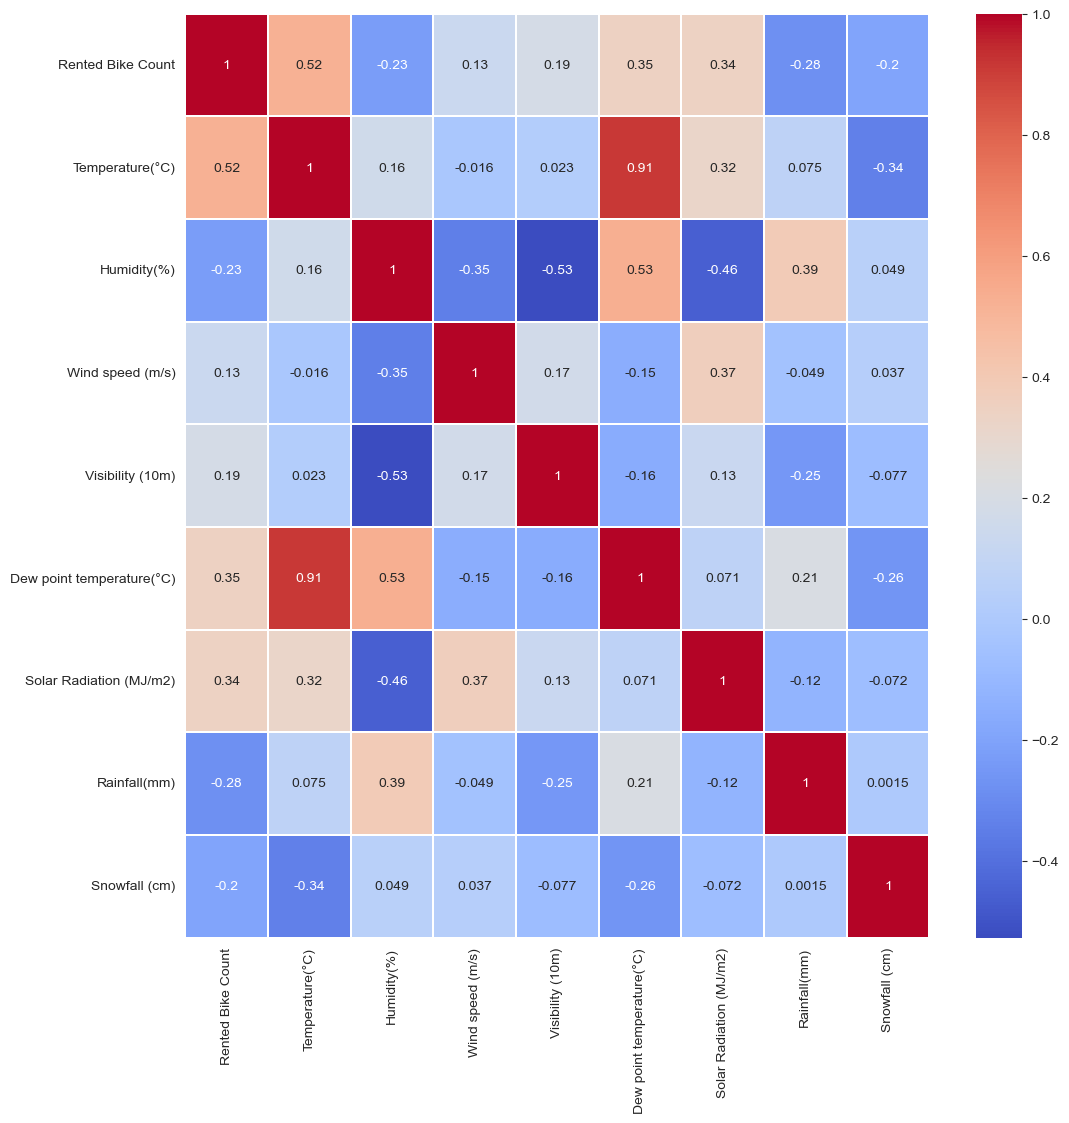

In [51]:
#. find correlation among variables
data_corr= df.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

As we can see from Heat Map that there is high correlation between Independent features Temperature and Dew Point Temperature.

Temperature has highest Positive correlation with Target variable Rented Bike Count 

Rainfall , snowfall and Humidity has neagtive correlation with Rented Bike Count

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select the numerical variables for VIF calculation
numerical_features = df.select_dtypes(include=['int', 'float'])

vif = pd.DataFrame()

vif["Variable"] = numerical_features.columns

vif["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

print(vif)

                    Variable        VIF
0          Rented Bike Count   1.731683
1            Temperature(°C)  47.196732
2                Humidity(%)  12.011760
3           Wind speed (m/s)   1.237722
4           Visibility (10m)   1.560134
5  Dew point temperature(°C)  60.543491
6    Solar Radiation (MJ/m2)   1.858374
7               Rainfall(mm)   1.298203
8              Snowfall (cm)   1.166784


In [53]:
#Drop Dew point temperature(°C) 
df.drop(columns=['Dew point temperature(°C)'],inplace=True)  

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_features = df.select_dtypes(include=['int', 'float'])

vif = pd.DataFrame()

vif["Variable"] = numerical_features.columns

vif["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

print(vif)

                  Variable       VIF
0        Rented Bike Count  1.723978
1          Temperature(°C)  2.111455
2              Humidity(%)  2.503773
3         Wind speed (m/s)  1.237471
4         Visibility (10m)  1.496195
5  Solar Radiation (MJ/m2)  1.827975
6             Rainfall(mm)  1.296638
7            Snowfall (cm)  1.162325


# ENCODING CATEGORICAL FEATURES

In [55]:
df=pd.get_dummies(df,columns=['Holiday','Seasons','Hour',"Functioning Day"],drop_first=True)

In [56]:
X=df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday_No Holiday',
       'Seasons_Summer', 'Seasons_Winter', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8','Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Functioning Day_Yes'
]]
y=df.iloc[:,0]

In [57]:
X

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0           -1.524521    -1.038829          0.618103          0.978214   
1           -1.550870    -0.986482         -0.923651          0.978214   
2           -1.594819    -0.934363         -0.640327          0.978214   
3           -1.612409    -0.882465         -0.778203          0.978214   
4           -1.594819    -1.091410          0.700184          0.978214   
...               ...          ...               ...               ...   
8755        -0.715942    -1.197308          0.932074          0.762392   
8756        -0.783248    -1.038829          0.700184          0.978214   
8757        -0.850709    -0.934363         -1.801586          0.912535   
8758        -0.892966    -0.830782         -0.640327          0.692237   
8759        -0.909892    -0.728037         -0.265185          0.792629   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                   -0.845761     -0.252859      -0.230785   
1                   -0.845761     -0.252859      -0.230785   
2                   -0.845761     -0.252859      -0.230785   
3                   -0.845761     -0.252859      -0.230785   
4                   -0.845761     -0.252859      -0.230785   
...                       ...           ...            ...   
8755                -0.845761     -0.252859      -0.230785   
8756                -0.845761     -0.252859      -0.230785   
8757                -0.845761     -0.252859      -0.230785   
8758                -0.845761     -0.252859      -0.230785   
8759                -0.845761     -0.252859      -0.230785   

      Holiday_No Holiday  Seasons_Summer  Seasons_Winter  Hour_1  Hour_2  \
0                      1               0               1       0       0   
1                      1               0               1       1       0   
2                      1               0               1       0       1   
3                      1               0               1       0       0   
4                      1               0               1       0       0   
...                  ...             ...             ...     ...     ...   
8755                   1               0               0       0       0   
8756                   1               0               0       0       0   
8757                   1               0               0       0       0   
8758                   1               0               0       0       0   
8759                   1               0               0       0       0   

      Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_15  Hour_16  \
0          0       0       0       0       0       0        0        0   
1          0       0       0       0       0       0        0        0   
2          0       0       0       0       0       0        0        0   
3          1       0       0       0       0       0        0        0   
4          0       1       0       0       0       0        0        0   
...      ...     ...     ...     ...     ...     ...      ...      ...   
8755       0       0       0       0       0       0        0        0   
8756       0       0       0       0       0       0        0        0   
8757       0       0       0       0       0       0        0        0   
8758       0       0       0       0       0       0        0        0   
8759       0       0       0       0       0       0        0        0   

      Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  \
0           0        0        0        0        0        0   
1           0        0        0        0        0        0   
2           0        0        0        0        0        0   
3           0        0        0        0        0        0   
4           0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...   
8755        0        0        1        0        0        0   
8756        0        0        0        1        0        0   
8757        

In [58]:
y

0      -0.530004
1      -0.676497
2      -0.779424
3      -1.047379
4      -1.200315
          ...   
8755    0.695553
8756    0.403665
8757    0.307082
8758    0.332501
8759    0.141594
Name: Rented Bike Count, Length: 8760, dtype: float64

# FEATURE SELECTION

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

In [60]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000001B313C2FC10>)

In [61]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

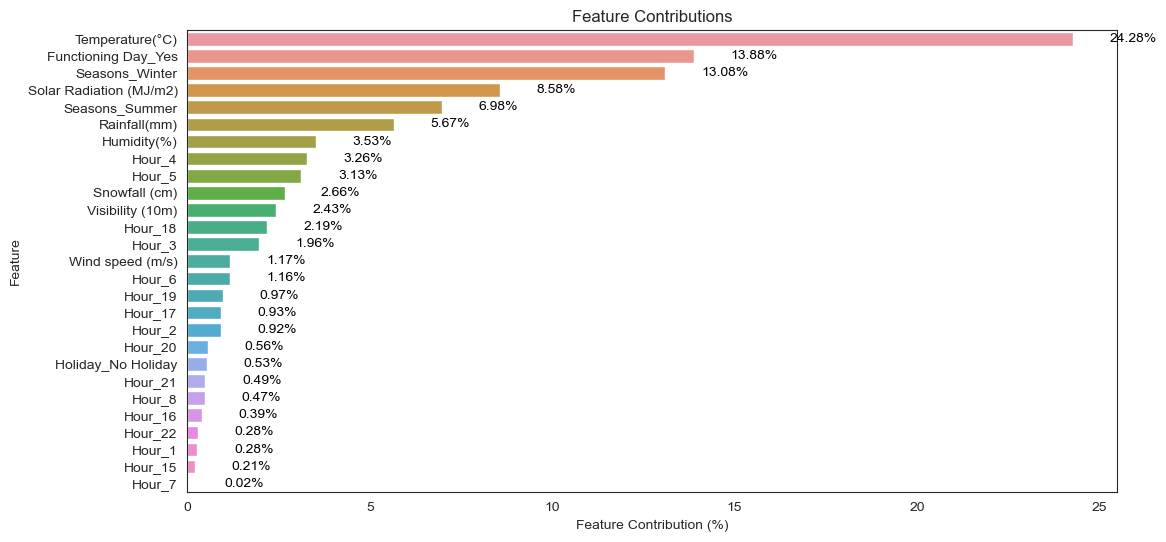

In [62]:
# Sort the feature contributions and column names in descending order
sorted_features = sorted(zip(X.columns, feature_contribution), key=lambda x: x[1], reverse=True)
sorted_columns = [f[0] for f in sorted_features]
sorted_contributions = [f[1] for f in sorted_features]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_contributions, y=sorted_columns)
plt.xlabel("Feature Contribution (%)")
plt.ylabel("Feature")
plt.title("Feature Contributions")

# Display the percentage values on top of the bars
for i, v in enumerate(sorted_contributions):
    ax.text(v + 1, i, f'{v:.2f}%', color='black', va='center')

plt.show()

# TEST - TRAIN SPLIT

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#splitting our dataset in 70% training and 30% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

# MODELING

# LINEAR REGRESSION

In [65]:
#creating dictionary for storing different models R Squre and RMSE
model_comparison={}

In [66]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f}")
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))]

Model R-Square : 79.09%
Model RMSE: 0.46


LINEAR REGRESSION USING OLS

In [68]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Add a constant to the independent variable(s) matrix
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     871.6
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:11:10   Log-Likelihood:                -3860.4
No. Observations:                6132   AIC:                             7777.
Df Residuals:                    6104   BIC:                             7965.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [69]:
residuals = results.resid
fitted_value=results.fittedvalues

In [70]:
np.mean(residuals)

-4.222088359873832e-15

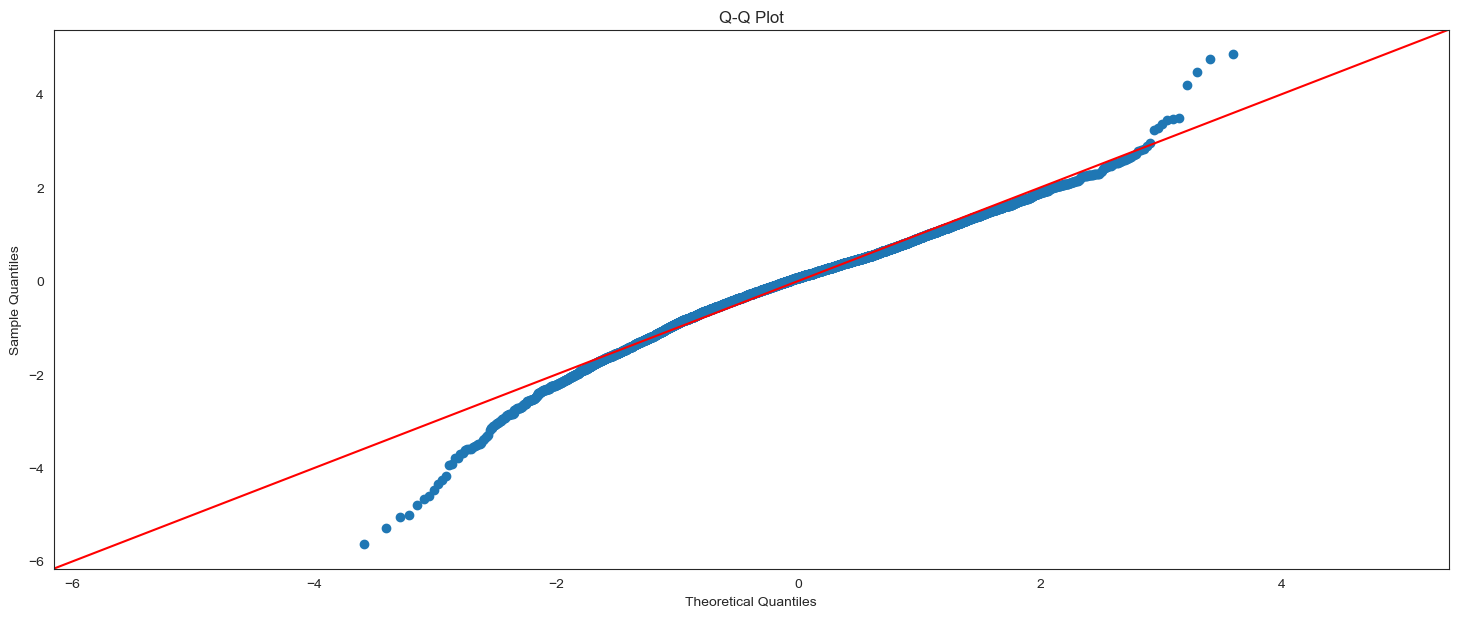

In [71]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

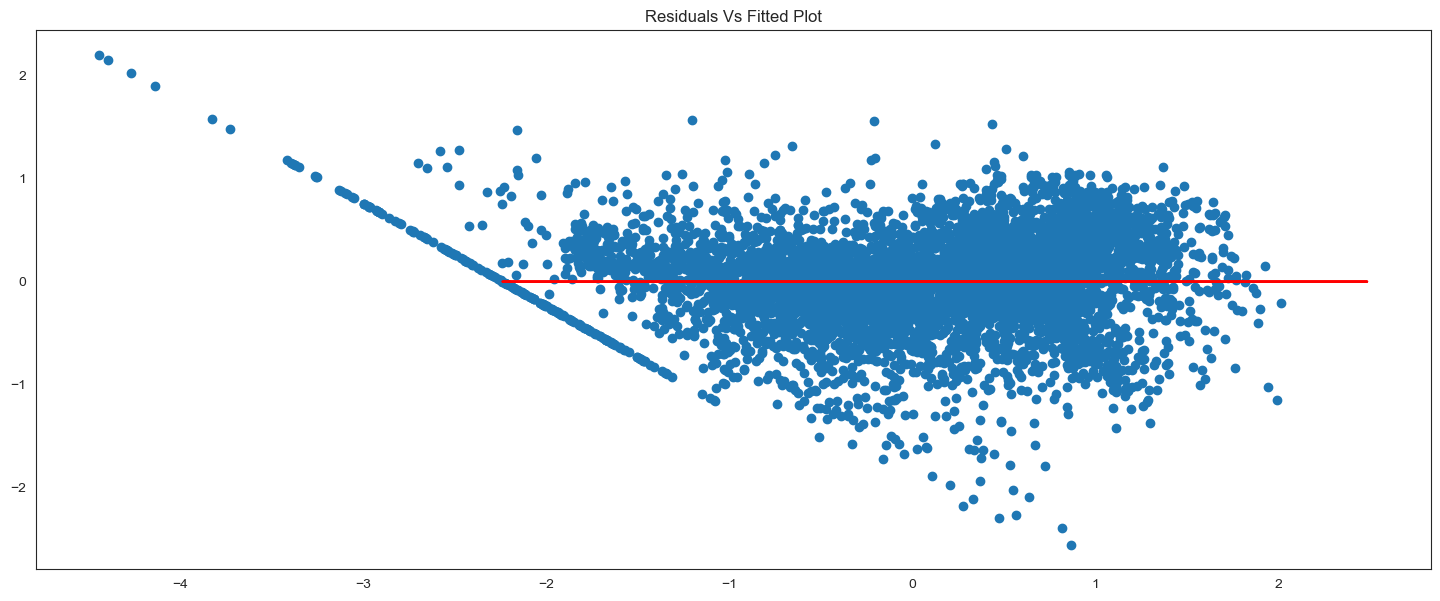

In [72]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

STATISTICAL TEST FOR CHECKING HOMOSCEDASTICITY IN RESIDUALS

In [73]:
import statsmodels.stats.api as sms

# Perform the Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, X_train)
print("Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test[0]:.4f}")
print(f"P-value: {bp_test[1]:.4f}")

Breusch-Pagan test results:
LM Statistic: 819.5217
P-value: 0.0000


PREDICTION ON TEST DATA

In [75]:
X_test = sm.add_constant(X_test)

y_pred_test = results.predict(X_test)

# Calculate R-squared on the test set
r2_test = r2_score(y_test, y_pred_test)
print(f"Test Set R-Squared: {r2_test:.2f}")

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test Set RMSE: {rmse_test:.2f}")

Test Set R-Squared: 0.79
Test Set RMSE: 0.46


In [76]:
X_train

const  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
5316    1.0         0.935979     1.060940         -0.923651          0.978214   
5845    1.0         2.069699    -0.986482          0.700184          0.710224   
3586    1.0         0.391166    -1.144234          0.261479          0.134922   
3054    1.0        -0.926833     0.019787          1.696604         -0.534642   
6805    1.0         1.182991    -0.986482          0.164227          0.978214   
...     ...              ...          ...               ...               ...   
4373    1.0         0.415978     0.829066         -0.640327         -0.499838   
7891    1.0         0.300146    -0.524881         -0.640327          0.369141   
4859    1.0         1.051295    -0.028964          0.261479         -0.922195   
3264    1.0        -0.372732     0.068399          0.533376          0.798688   
2732    1.0        -0.472937     1.198891          1.404661         -1.801602   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
5316                 0.930302     -0.252859      -0.230785   
5845                 1.667324     -0.252859      -0.230785   
3586                 1.579705     -0.252859      -0.230785   
3054                -0.845761     -0.252859      -0.230785   
6805                 1.619912     -0.252859      -0.230785   
...                       ...           ...            ...   
4373                -0.845761     -0.252859      -0.230785   
7891                -0.845761     -0.252859      -0.230785   
4859                 1.664096     -0.252859      -0.230785   
3264                -0.845761     -0.252859      -0.230785   
2732                -0.845761     -0.252859      -0.230785   

      Holiday_No Holiday  Seasons_Summer  Seasons_Winter  Hour_1  Hour_2  \
5316                   1               1               0       0       0   
5845                   1               1               0       0       0   
3586                   1               0               0       0       0   
3054                   1               0               0       0       0   
6805                   1               0               0       0       0   
...                  ...             ...             ...     ...     ...   
4373                   1               1               0       0       0   
7891                   1               0               0       0       0   
4859                   1               1               0       0       0   
3264                   1               0               0       0       0   
2732                   1               0               0       0       0   

      Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_15  Hour_16  \
5316       0       0       0       0       0       0        0        0   
5845       0       0       0       0       0       0        0        0   
3586       0       0       0       0       0       0        0        0   
3054       0       0       0       1       0       0        0        0   
6805       0       0       0       0       0       0        0        0   
...      ...     ...     ...     ...     ...     ...      ...      ...   
4373       0       0       1       0       0       0        0        0   
7891       0       0       0       0       0       0        0        0   
4859       0       0       0       0       0       0        0        0   
3264       0       0       0       0       0       0        0        0   
2732       0       0       0       0       0       0        0        0   

      Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  \
5316        0        0        0        0        0        0   
5845        0        0        0        0        0        0   
3586        0        0        0        0        0        0   
3054        0        0        0        0        0        0   
6805        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...   
4373        0        0        0        0        0   

In [77]:
X_test

const  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
4059    1.0        -0.172791     0.735596         -0.265185          0.978214   
6914    1.0         0.738103     0.968491         -0.640327          0.978214   
233     1.0        -0.766408     0.357266          1.959178         -0.741049   
982     1.0        -1.921119    -0.324588          1.076013          0.978214   
5967    1.0         1.717086     0.019787          1.583708         -0.087971   
...     ...              ...          ...               ...               ...   
2909    1.0        -0.039793     0.357266         -1.414995         -0.703113   
2244    1.0        -0.172791     1.290392         -0.778203         -1.627977   
5121    1.0         0.680341     1.832133         -0.265185         -1.093945   
322     1.0        -1.744524    -0.728037         -0.778203          0.107106   
2731    1.0        -0.422812     1.060940          1.076013         -1.776663   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
4059                -0.845761     -0.252859      -0.230785   
6914                -0.845761     -0.252859      -0.230785   
233                 -0.691315     -0.252859       4.336146   
982                 -0.845761     -0.252859      -0.230785   
5967                 1.530644     -0.252859      -0.230785   
...                       ...           ...            ...   
2909                -0.845761     -0.252859      -0.230785   
2244                 0.676819     -0.252859      -0.230785   
5121                -0.225912      4.021693      -0.230785   
322                  0.366504     -0.252859      -0.230785   
2731                -0.595654     -0.252859      -0.230785   

      Holiday_No Holiday  Seasons_Summer  Seasons_Winter  Hour_1  Hour_2  \
4059                   1               0               0       0       0   
6914                   1               0               0       0       1   
233                    1               0               1       0       0   
982                    1               0               1       0       0   
5967                   1               1               0       0       0   
...                  ...             ...             ...     ...     ...   
2909                   1               0               0       0       0   
2244                   1               0               0       0       0   
5121                   1               1               0       0       0   
322                    1               0               1       0       0   
2731                   1               0               0       0       0   

      Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_15  Hour_16  \
4059       1       0       0       0       0       0        0        0   
6914       0       0       0       0       0       0        0        0   
233        0       0       0       0       0       0        0        0   
982        0       0       0       0       0       0        0        0   
5967       0       0       0       0       0       0        1        0   
...      ...     ...     ...     ...     ...     ...      ...      ...   
2909       0       0       1       0       0       0        0        0   
2244       0       0       0       0       0       0        0        0   
5121       0       0       0       0       0       0        0        0   
322        0       0       0       0       0       0        0        0   
2731       0       0       0       0       0       0        0        0   

      Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  \
4059        0        0        0        0        0        0   
6914        0        0        0        0        0        0   
233         1        0        0        0        0        0   
982         0        0        0        0        0        1   
5967        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...   
2909        0        0        0        0        0   

In [81]:
 X_train.drop(['const'], axis=1, inplace=True)

In [79]:
X_test.drop(['const'], axis=1, inplace=True)

# KNN REGRESSOR

In [82]:
# Create the KNN regressor
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate and print the R-square value
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f}")
model_comparison['KNeighborsRegressor']=[r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))]

Model R-Square : 76.12%
Model RMSE: 0.49


# PLOT B/W ERROR RATE & NO. OF NEIGHBORS(K)

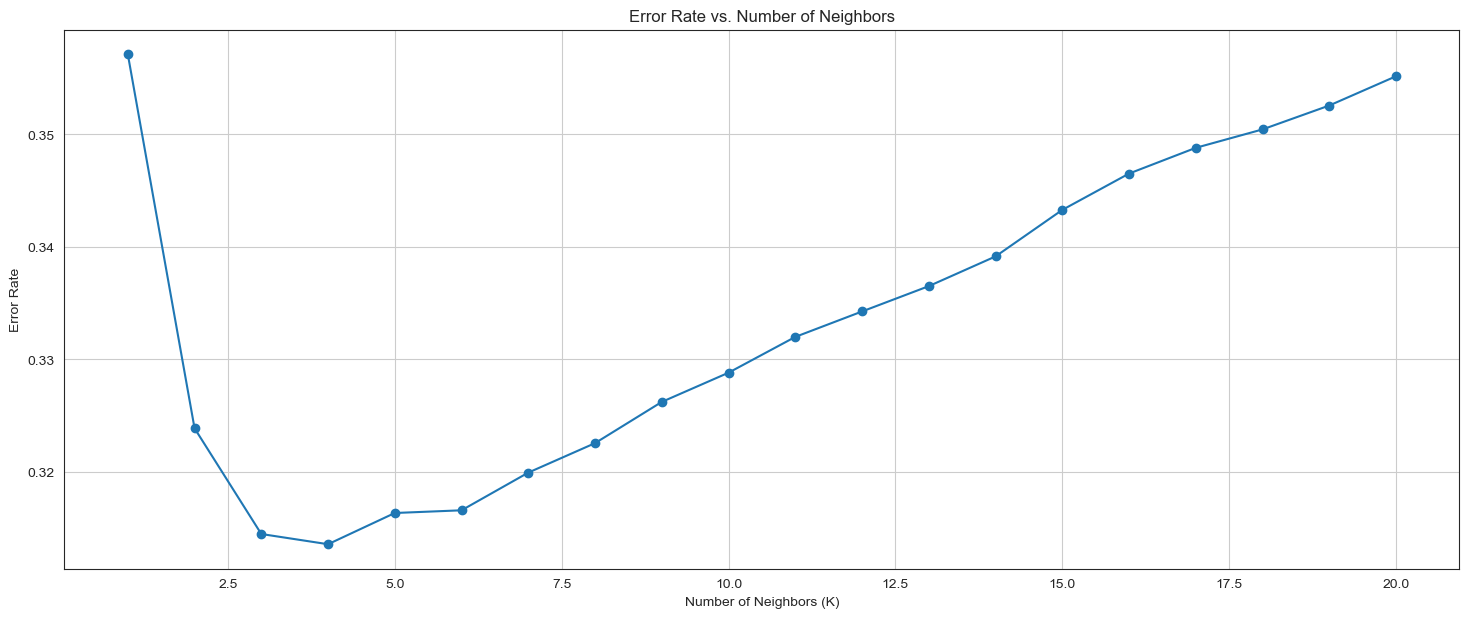

In [83]:
n_neighbors_range = range(1, 21)
error_rates = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = np.mean(np.abs(y_pred - y_test))
    error_rates.append(error_rate)

plt.plot(n_neighbors_range, error_rates, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neighbors')
plt.grid(True)
plt.show()

# DECISION TREE REGRESSOR

In [84]:
model=DecisionTreeRegressor(max_depth = 15, min_samples_split= 9, min_samples_leaf=4)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Calculate and print the R-square value
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f}")
model_comparison['DecisionTreeRegressor']=[r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))]

Model R-Square : 81.01%
Model RMSE: 0.43


# HYPERTUNED DECISION TREE REGRESSOR

In [ ]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    model = DecisionTreeRegressor(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    
    return r2

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_r2 = study.best_value

print("Best Hyperparameters:", best_params)
print("Best R-Squared:", best_r2)

# RANDOM FOREST REGRESSOR

In [85]:
model = RandomForestRegressor(n_estimators=160,
                              max_depth=18,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features='auto',
                              random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f}")
model_comparison['RandomForestRegressor']=[r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))]

Model R-Square : 87.62%
Model RMSE: 0.35


# HYPERTUNED RANDOM FOREST REGRESSOR

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 15)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    rf = RandomForestRegressor(n_estimators=n_estimators, 
                               max_depth=max_depth, 
                               max_features=max_features, 
                               min_samples_leaf=min_samples_leaf, 
                               min_samples_split=min_samples_split,
                               random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    r2 = r2_score(y_val, y_pred)

    return r2

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_r2 = study.best_value

print("Best Hyperparameters:", best_params)
print("Best R-Squared:", best_r2)

# MODEL COMPARISON

In [86]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','RMSE']

In [87]:
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:,.2}").background_gradient(cmap='RdYlBu_r')